In [1]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import random
import seaborn as sns
from matplotlib.ticker import MultipleLocator

In [2]:
# Reading Excel Files

df_demographics = pd.read_excel(r'C:\Users\User\Desktop\پروژه کاشناسی\داده\Telco_customer_churn_demographics.xlsx')
df_location = pd.read_excel(r'C:\Users\User\Desktop\پروژه کاشناسی\داده\Telco_customer_churn_location.xlsx')
df_population = pd.read_excel(r'C:\Users\User\Desktop\پروژه کاشناسی\داده\Telco_customer_churn_population.xlsx')
df_services = pd.read_excel(r'C:\Users\User\Desktop\پروژه کاشناسی\داده\Telco_customer_churn_services.xlsx')
df_status = pd.read_excel(r'C:\Users\User\Desktop\پروژه کاشناسی\داده\Telco_customer_churn_status.xlsx')

In [3]:
# Merging Dataframes
# Dropping Duplicate Columns

df = df_demographics.merge(df_location).merge(df_services).merge(df_status)
df.reset_index().T.drop_duplicates().T

index Customer ID Count  Gender Age Under 30 Senior Citizen Married  \
0        0  8779-QRDMV     1    Male  78       No            Yes      No   
1        1  7495-OOKFY     1  Female  74       No            Yes     Yes   
2        2  1658-BYGOY     1    Male  71       No            Yes      No   
3        3  4598-XLKNJ     1  Female  78       No            Yes     Yes   
4        4  4846-WHAFZ     1  Female  80       No            Yes     Yes   
...    ...         ...   ...     ...  ..      ...            ...     ...   
7038  7038  2569-WGERO     1  Female  30       No             No      No   
7039  7039  6840-RESVB     1    Male  38       No             No     Yes   
7040  7040  2234-XADUH     1  Female  30       No             No     Yes   
7041  7041  4801-JZAZL     1  Female  32       No             No     Yes   
7042  7042  3186-AJIEK     1    Male  44       No             No      No   

     Dependents Number of Dependents  ... Total Long Distance Charges  \
0            No                    0  ...                         0.0   
1           Yes                    1  ...                       390.8   
2           Yes                    3  ...                      203.94   
3           Yes                    1  ...                       494.0   
4           Yes                    1  ...                      234.21   
...         ...                  ...  ...                         ...   
7038         No                    0  ...                     1639.44   
7039        Yes                    2  ...                       865.2   
7040        Yes                    2  ...                     2135.52   
7041        Yes                    2  ...                         0.0   
7042         No                    0  ...                     2043.36   

     Total Revenue Satisfaction Score Customer Status Churn Label Churn Value  \
0            59.65                  3         Churned         Yes           1   
1           1024.1                  3         Churned         Yes           1   
2          1910.88                  2         Churned         Yes           1   
3          2995.07                  2         Churned         Yes           1   
4          3102.36                  2         Churned         Yes           1   
...            ...                ...             ...         ...         ...   
7038       3039.53                  5          Stayed          No           0   
7039       2807.47                  3          Stayed          No           0   
7040       9453.04                  4          Stayed          No           0   
7041        319.21                  4          Stayed          No           0   
7042       8887.86                  4          Stayed          No           0   

     Churn Score  CLTV   Churn Category                  Churn Reason  
0             91  5433       Competitor  Competitor offered more data  
1             69  5302       Competitor  Competitor made better offer  
2             81  3179       Competitor  Competitor made better offer  
3             88  5337  Dissatisfaction     Limited range of services  
4             67  2793            Price            Extra data charges  
...          ...   ...              ...                           ...  
7038          45  5306              NaN                           NaN  
7039          59  2140              NaN                           NaN  
7040          71  5560              NaN                           NaN  
7041          59  2793              NaN                           NaN  
7042          38  5097              NaN                           NaN  

[7043 rows x 53 columns]

In [4]:
# Replace special characters with Nan

Special_Characters = ['None','_','?','!']
for character in Special_Characters:
    df = df.replace(character,np.nan)

In [5]:
# Dropping Features with a large number of Nan values
# Dropping Unnecessary Features

Nan_rate = 0.25
for column in df.columns :
    if df[column].isnull().sum(axis = 0) > len(df[column])*Nan_rate :
        print('Column ' + str(column) + ' is removed.')
        df = df.drop(columns=[column])
df = df.drop(columns=['Lat Long','Customer Status','Zip Code'])
print('Column ' + 'Lat Long' + ' is removed.')
print('Column ' + 'Customer Status' + ' is removed.')
print('Column ' + 'Zip Code' + ' is removed.')
pd.set_option('display.max_columns', None)
df

Column Offer is removed.
Column Churn Category is removed.
Column Churn Reason is removed.
Column Lat Long is removed.
Column Customer Status is removed.
Column Zip Code is removed.


Customer ID  Count  Gender  Age Under 30 Senior Citizen Married  \
0     8779-QRDMV      1    Male   78       No            Yes      No   
1     7495-OOKFY      1  Female   74       No            Yes     Yes   
2     1658-BYGOY      1    Male   71       No            Yes      No   
3     4598-XLKNJ      1  Female   78       No            Yes     Yes   
4     4846-WHAFZ      1  Female   80       No            Yes     Yes   
...          ...    ...     ...  ...      ...            ...     ...   
7038  2569-WGERO      1  Female   30       No             No      No   
7039  6840-RESVB      1    Male   38       No             No     Yes   
7040  2234-XADUH      1  Female   30       No             No     Yes   
7041  4801-JZAZL      1  Female   32       No             No     Yes   
7042  3186-AJIEK      1    Male   44       No             No      No   

     Dependents  Number of Dependents        Country       State  \
0            No                     0  United States  California   
1           Yes                     1  United States  California   
2           Yes                     3  United States  California   
3           Yes                     1  United States  California   
4           Yes                     1  United States  California   
...         ...                   ...            ...         ...   
7038         No                     0  United States  California   
7039        Yes                     2  United States  California   
7040        Yes                     2  United States  California   
7041        Yes                     2  United States  California   
7042         No                     0  United States  California   

              City   Latitude   Longitude Quarter Referred a Friend  \
0      Los Angeles  34.023810 -118.156582      Q3                No   
1      Los Angeles  34.044271 -118.185237      Q3               Yes   
2      Los Angeles  34.108833 -118.229715      Q3                No   
3        Inglewood  33.936291 -118.332639      Q3               Yes   
4         Whittier  33.972119 -118.020188      Q3               Yes   
...            ...        ...         ...     ...               ...   
7038       Landers  34.341737 -116.539416      Q3                No   
7039      Adelanto  34.667815 -117.536183      Q3               Yes   
7040         Amboy  34.559882 -115.637164      Q3               Yes   
7041  Angelus Oaks  34.167800 -116.864330      Q3               Yes   
7042  Apple Valley  34.424926 -117.184503      Q3                No   

      Number of Referrals  Tenure in Months Phone Service  \
0                       0                 1            No   
1                       1                 8           Yes   
2                       0                18           Yes   
3                       1                25           Yes   
4                       1                37           Yes   
...                   ...               ...           ...   
7038                    0                72           Yes   
7039                    1                24           Yes   
7040                    4                72           Yes   
7041                    1                11            No   
7042                    0                66           Yes   

      Avg Monthly Long Distance Charges Multiple Lines Internet Service  \
0                                  0.00             No              Yes   
1                                 48.85            Yes              Yes   
2                                 11.33            Yes              Yes   
3                                 19.76             No              Yes   
4                                  6.33            Yes              Yes   
...                                 ...            ...              ...   
7038                              22.77             No               No   
7039                              36.05            Yes              Yes   
7040                              29.66            Yes        

In [6]:
# Finding Columns with Nan Values

column_with_nan = 0
for column in df.columns :
    if df[column].isnull().sum(axis = 0) > 0 :
        print("Number of Nan Values in Column " + str(column) + " is " + str(df[column].isnull().sum(axis = 0)))
        column_with_nan += 1
if column_with_nan== 0 :
    print('There is no Nan Values in The Dataframe')

Number of Nan Values in Column Internet Type is 1526


In [7]:
# Fill in missing values

for column in df.columns:
    if df[column].dtype == object :
        df[column] = df[column].replace(np.nan,df[column].value_counts().idxmax())
    if df[column].dtype == (int or float) :
        df[column] = df[column].replace(np.nan,df[column].mean())

In [8]:
# Dropping Features with only one value

for column in df.columns:
    if len(df[column].unique()) == 1:
        print('Column ' + str(column) + ' is removed.')
        df = df.drop(columns=[column])

Column Count is removed.
Column Country is removed.
Column State is removed.
Column Quarter is removed.


In [9]:
# Create a dataframe with categorical values

str_dict = {}

for column in df.columns :
    if df[column].dtype == object and column != 'Customer ID' :
        str_dict.update({column : df[column]})
df_str = pd.DataFrame(str_dict)
pd.set_option('display.max_columns', None)
df_str

Gender Under 30 Senior Citizen Married Dependents          City  \
0       Male       No            Yes      No         No   Los Angeles   
1     Female       No            Yes     Yes        Yes   Los Angeles   
2       Male       No            Yes      No        Yes   Los Angeles   
3     Female       No            Yes     Yes        Yes     Inglewood   
4     Female       No            Yes     Yes        Yes      Whittier   
...      ...      ...            ...     ...        ...           ...   
7038  Female       No             No      No         No       Landers   
7039    Male       No             No     Yes        Yes      Adelanto   
7040  Female       No             No     Yes        Yes         Amboy   
7041  Female       No             No     Yes        Yes  Angelus Oaks   
7042    Male       No             No      No         No  Apple Valley   

     Referred a Friend Phone Service Multiple Lines Internet Service  \
0                   No            No             No              Yes   
1                  Yes           Yes            Yes              Yes   
2                   No           Yes            Yes              Yes   
3                  Yes           Yes             No              Yes   
4                  Yes           Yes            Yes              Yes   
...                ...           ...            ...              ...   
7038                No           Yes             No               No   
7039               Yes           Yes            Yes              Yes   
7040               Yes           Yes            Yes              Yes   
7041               Yes            No             No              Yes   
7042                No           Yes             No              Yes   

     Internet Type Online Security Online Backup Device Protection Plan  \
0              DSL              No            No                    Yes   
1      Fiber Optic              No           Yes                     No   
2      Fiber Optic              No            No                     No   
3      Fiber Optic              No           Yes                    Yes   
4      Fiber Optic              No            No                     No   
...            ...             ...           ...                    ...   
7038   Fiber Optic              No            No                     No   
7039         Cable             Yes            No                    Yes   
7040   Fiber Optic              No           Yes                    Yes   
7041           DSL             Yes            No                     No   
7042   Fiber Optic             Yes            No                    Yes   

     Premium Tech Support Streaming TV Streaming Movies Streaming Music  \
0                      No           No              Yes              No   
1                      No           No               No              No   
2                      No          Yes              Yes             Yes   
3                      No          Yes              Yes              No   
4                      No           No               No              No   
...                   ...          ...              ...             ...   
7038                   No           No               No              No   
7039                  Yes          Yes              Yes             Yes   
7040                   No          Yes              Yes             Yes   
7041                   No           No               No              No   
7042                  Yes          Yes              Yes             Yes   

     Unlimited Data        Contract Paperless Billing   Payment Method  \
0                No  Month-to-Month               Yes  Bank Withdrawal   
1               Yes  Month-to-Month               Yes      Credit Card   
2               Yes  Month-to-Month               Yes  Bank Withdrawal   
3               Yes  Month-to-Month               Yes  Bank Withdrawal   
4               Yes  Month-to-Month               Yes  Bank Withdrawal   
...             ..

In [10]:
# Count the number of unique values in str dataframe

for column in df_str.columns:
    print('Number of Values in ' + str(column) + ' column is : ' + str(len(df[column].unique())))

Number of Values in Gender column is : 2
Number of Values in Under 30 column is : 2
Number of Values in Senior Citizen column is : 2
Number of Values in Married column is : 2
Number of Values in Dependents column is : 2
Number of Values in City column is : 1106
Number of Values in Referred a Friend column is : 2
Number of Values in Phone Service column is : 2
Number of Values in Multiple Lines column is : 2
Number of Values in Internet Service column is : 2
Number of Values in Internet Type column is : 3
Number of Values in Online Security column is : 2
Number of Values in Online Backup column is : 2
Number of Values in Device Protection Plan column is : 2
Number of Values in Premium Tech Support column is : 2
Number of Values in Streaming TV column is : 2
Number of Values in Streaming Movies column is : 2
Number of Values in Streaming Music column is : 2
Number of Values in Unlimited Data column is : 2
Number of Values in Contract column is : 3
Number of Values in Paperless Billing co

In [11]:
# get top 10 most frequent cities and return a list of values

n = 15
n_most_common_city = df['City'].value_counts()[:n].index.tolist()
n_most_common_city

['Los Angeles',
 'San Diego',
 'San Jose',
 'Sacramento',
 'San Francisco',
 'Fresno',
 'Long Beach',
 'Oakland',
 'Escondido',
 'Stockton',
 'Fallbrook',
 'Glendale',
 'Bakersfield',
 'Temecula',
 'Riverside']

In [12]:
# Obtain Max, Min, Mean for latitude and longitude

print('Max latitude : ' + str(max(df['Latitude'])))
print('Min latitude : ' + str(min(df['Latitude'])))
print('Mean latitude : ' + str(np.mean(df['Latitude'])))
print('Max longitude : ' + str(max(df['Longitude'])))
print('Min latitude : ' + str(min(df['Longitude'])))
print('Mean latitude : ' + str(np.mean(df['Longitude'])))

Max latitude : 41.962127
Min latitude : 32.555828
Mean latitude : 36.19745482180889
Max longitude : -114.192901
Min latitude : -124.301372
Mean latitude : -119.75668367414455


In [13]:
# Reducing the values of the City column and converting it to the Region column

df['Region'] = df['City']

for city in df['City'].unique():
    if df.loc[df['City'] == city, 'Latitude'].iloc[0] > np.mean(df['Latitude']) and df.loc[df['City'] == city, 'Longitude'].iloc[0] > np.mean(df['Longitude']):
        df.loc[df['City'] == city, 'Region'] = 'North_East'
    elif df.loc[df['City'] == city, 'Latitude'].iloc[0] > np.mean(df['Latitude']) and df.loc[df['City'] == city, 'Longitude'].iloc[0] < np.mean(df['Longitude']):
        df.loc[df['City'] == city, 'Region'] = 'North_West'
    elif df.loc[df['City'] == city, 'Latitude'].iloc[0] < np.mean(df['Latitude']) and df.loc[df['City'] == city, 'Longitude'].iloc[0] > np.mean(df['Longitude']):
        df.loc[df['City'] == city, 'Region'] = 'South_East'
    else:
        df.loc[df['City'] == city, 'Region'] = 'South_West'

df = df.drop(['City'], axis=1)
df_str = df_str.drop(['City'], axis=1)
df_str['Region'] = df['Region']

In [14]:
# One Hot Encoding Categorical Columns

for categorical_column in df_str.columns :
    if categorical_column != 'Churn Label':
        one_hot = pd.get_dummies(df[categorical_column],prefix=categorical_column)
        df = df.drop(categorical_column,axis = 1)
        df = pd.concat([df,one_hot],axis=1)
df  

Customer ID  Age  Number of Dependents   Latitude   Longitude  \
0     8779-QRDMV   78                     0  34.023810 -118.156582   
1     7495-OOKFY   74                     1  34.044271 -118.185237   
2     1658-BYGOY   71                     3  34.108833 -118.229715   
3     4598-XLKNJ   78                     1  33.936291 -118.332639   
4     4846-WHAFZ   80                     1  33.972119 -118.020188   
...          ...  ...                   ...        ...         ...   
7038  2569-WGERO   30                     0  34.341737 -116.539416   
7039  6840-RESVB   38                     2  34.667815 -117.536183   
7040  2234-XADUH   30                     2  34.559882 -115.637164   
7041  4801-JZAZL   32                     2  34.167800 -116.864330   
7042  3186-AJIEK   44                     0  34.424926 -117.184503   

      Number of Referrals  Tenure in Months  \
0                       0                 1   
1                       1                 8   
2                       0                18   
3                       1                25   
4                       1                37   
...                   ...               ...   
7038                    0                72   
7039                    1                24   
7040                    4                72   
7041                    1                11   
7042                    0                66   

      Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
0                                  0.00                        8   
1                                 48.85                       17   
2                                 11.33                       52   
3                                 19.76                       12   
4                                  6.33                       14   
...                                 ...                      ...   
7038                              22.77                        0   
7039                              36.05                       24   
7040                              29.66                       59   
7041                               0.00                       17   
7042                              30.96                       11   

      Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
0              39.65          39.65           0.00                        20   
1              80.65         633.30           0.00                         0   
2              95.45        1752.55          45.61                         0   
3              98.50        2514.50          13.43                         0   
4              76.50        2868.15           0.00                         0   
...              ...            ...            ...                       ...   
7038           21.15        1419.40          19.31                         0   
7039           84.80        1990.50          48.23                         0   
7040          103.20        7362.90          45.38                         0   
7041           29.60         346.45          27.24                         0   
7042          105.65        6844.50           0.00                         0   

      Total Long Distance Charges  Total Revenue  Satisfaction Score  \
0                            0.00          59.65                   3   
1                          390.80        1024.10                   3   
2                          203.94        1910.88                   2   
3                          494.00        2995.07                   2   
4                          234.21        3102.36                   2   
...                           ...            ...                 ...   
7038                      1639.44        3039.53                   5   
7039                       865.20        2807.47                   3   
7040                      2135.52        9453.04                   4   
7041                         0.00         319.21                   4   
7042                      204

In [15]:
# Move Columns

new_cols= ['Customer ID', 'Age', 'Number of Dependents', 'Latitude',
       'Longitude', 'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue','Gender_Female', 'Gender_Male', 'Under 30_No',
       'Under 30_Yes', 'Senior Citizen_No', 'Senior Citizen_Yes', 'Married_No',
       'Married_Yes', 'Dependents_No', 'Dependents_Yes', 'Region_North_East', 
       'Region_North_West', 'Region_South_East', 'Region_South_West',
       'Referred a Friend_No', 'Referred a Friend_Yes', 'Phone Service_No',
       'Phone Service_Yes', 'Multiple Lines_No', 'Multiple Lines_Yes',
       'Internet Service_No', 'Internet Service_Yes', 'Internet Type_Cable',
       'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Online Security_No',
       'Online Security_Yes', 'Online Backup_No', 'Online Backup_Yes',
       'Device Protection Plan_No', 'Device Protection Plan_Yes',
       'Premium Tech Support_No', 'Premium Tech Support_Yes',
       'Streaming TV_No', 'Streaming TV_Yes', 'Streaming Movies_No',
       'Streaming Movies_Yes', 'Streaming Music_No', 'Streaming Music_Yes',
       'Unlimited Data_No', 'Unlimited Data_Yes', 'Contract_Month-to-Month',
       'Contract_One Year', 'Contract_Two Year', 'Paperless Billing_No',
       'Paperless Billing_Yes', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check','Satisfaction Score', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV']
df = df.reindex(columns=new_cols)
df

Customer ID  Age  Number of Dependents   Latitude   Longitude  \
0     8779-QRDMV   78                     0  34.023810 -118.156582   
1     7495-OOKFY   74                     1  34.044271 -118.185237   
2     1658-BYGOY   71                     3  34.108833 -118.229715   
3     4598-XLKNJ   78                     1  33.936291 -118.332639   
4     4846-WHAFZ   80                     1  33.972119 -118.020188   
...          ...  ...                   ...        ...         ...   
7038  2569-WGERO   30                     0  34.341737 -116.539416   
7039  6840-RESVB   38                     2  34.667815 -117.536183   
7040  2234-XADUH   30                     2  34.559882 -115.637164   
7041  4801-JZAZL   32                     2  34.167800 -116.864330   
7042  3186-AJIEK   44                     0  34.424926 -117.184503   

      Number of Referrals  Tenure in Months  \
0                       0                 1   
1                       1                 8   
2                       0                18   
3                       1                25   
4                       1                37   
...                   ...               ...   
7038                    0                72   
7039                    1                24   
7040                    4                72   
7041                    1                11   
7042                    0                66   

      Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
0                                  0.00                        8   
1                                 48.85                       17   
2                                 11.33                       52   
3                                 19.76                       12   
4                                  6.33                       14   
...                                 ...                      ...   
7038                              22.77                        0   
7039                              36.05                       24   
7040                              29.66                       59   
7041                               0.00                       17   
7042                              30.96                       11   

      Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
0              39.65          39.65           0.00                        20   
1              80.65         633.30           0.00                         0   
2              95.45        1752.55          45.61                         0   
3              98.50        2514.50          13.43                         0   
4              76.50        2868.15           0.00                         0   
...              ...            ...            ...                       ...   
7038           21.15        1419.40          19.31                         0   
7039           84.80        1990.50          48.23                         0   
7040          103.20        7362.90          45.38                         0   
7041           29.60         346.45          27.24                         0   
7042          105.65        6844.50           0.00                         0   

      Total Long Distance Charges  Total Revenue  Gender_Female  Gender_Male  \
0                            0.00          59.65              0            1   
1                          390.80        1024.10              1            0   
2                          203.94        1910.88              0            1   
3                          494.00        2995.07              1            0   
4                          234.21        3102.36              1            0   
...                           ...            ...            ...          ...   
7038                      1639.44        3039.53              1            0   
7039                       865.20        2807.47              0            1   
7040                      2135.52        9453.04              1            0   
7041                 

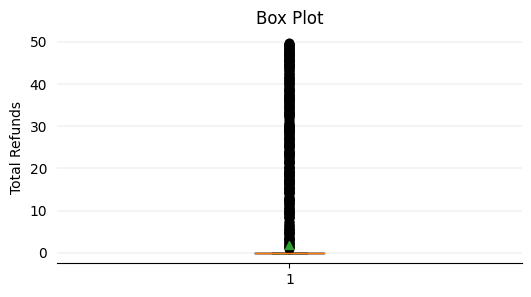

In [16]:
# Outlier Detection using IQR Method

boxplot_list = ['Number of Dependents', 'Latitude',
       'Longitude', 'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue']
selected_column = random.choice(boxplot_list)

fig, ax = plt.subplots(figsize=(6, 3))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.set_ylabel(str(selected_column))
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_title('Box Plot')
ax.boxplot(df[selected_column], showmeans=True)
plt.show()

In [17]:
len(df[df['Number of Dependents'] == 0])

5416

In [18]:
df['Number of Dependents'].quantile(0.75)

0.0

In [19]:
# Removing Outliers

def remove_outliers(df, cols):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 10 * iqr
        upper_bound = q3 + 10 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df = remove_outliers(df, boxplot_list)
df = df.reset_index(drop=True)
df

Customer ID  Age  Number of Dependents   Latitude   Longitude  \
0     9947-OTFQU   65                     0  34.097345 -117.906736   
1     9514-JDSKI   77                     0  34.074492 -118.014620   
2     7273-TEFQD   67                     0  34.038983 -117.991372   
3     4385-GZQXV   68                     0  34.074087 -117.605618   
4     3488-PGMQJ   66                     0  32.827184 -116.703729   
...          ...  ...                   ...        ...         ...   
4478  6075-SLNIL   47                     0  33.889605 -115.257009   
4479  9347-AERRL   60                     0  33.948558 -116.516976   
4480  1471-GIQKQ   37                     0  33.345825 -115.596574   
4481  0871-OPBXW   57                     0  33.141265 -116.967221   
4482  3186-AJIEK   44                     0  34.424926 -117.184503   

      Number of Referrals  Tenure in Months  \
0                       0                15   
1                       1                 1   
2                       0                 3   
3                       0                16   
4                       0                 8   
...                   ...               ...   
4478                    0                38   
4479                    3                23   
4480                    0                 1   
4481                    0                 2   
4482                    0                66   

      Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
0                                 29.11                       29   
1                                  0.00                       12   
2                                  0.00                       28   
3                                  9.43                        9   
4                                  1.78                        7   
...                                 ...                      ...   
4478                               6.71                       11   
4479                              36.14                        0   
4480                              44.98                       27   
4481                               6.85                        0   
4482                              30.96                       11   

      Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
0              74.40        1074.30            0.0                         0   
1              40.20          40.20            0.0                         0   
2              41.15         132.20            0.0                         0   
3              94.45        1511.20            0.0                         0   
4              74.50         606.55            0.0                         0   
...              ...            ...            ...                       ...   
4478           95.10        3691.20            0.0                         0   
4479           19.30         486.20            0.0                         0   
4480           49.95          49.95            0.0                         0   
4481           20.05          39.25            0.0                         0   
4482          105.65        6844.50            0.0                         0   

      Total Long Distance Charges  Total Revenue  Gender_Female  Gender_Male  \
0                          436.65        1510.95              0            1   
1                            0.00          40.20              0            1   
2                            0.00         132.20              0            1   
3                          150.88        1662.08              1            0   
4                           14.24         620.79              0            1   
...                           ...            ...            ...          ...   
4478                       254.98        3946.18              0            1   
4479                       831.22        1317.42              0            1   
4480                        44.98          94.93              1            0   
4481                 

In [20]:
# Dropping Features with only one value

for column in df.columns:
    if len(df[column].unique()) == 1:
        print('Column ' + str(column) + ' is removed.')
        df = df.drop(columns=[column])

Column Number of Dependents is removed.
Column Total Refunds is removed.
Column Total Extra Data Charges is removed.
Column Dependents_No is removed.
Column Dependents_Yes is removed.


In [21]:
# Data Normalization

not_normalized_column = ['Customer ID','Satisfaction Score','Churn Label','Churn Value', 'Churn Score', 'CLTV']
for column in df.columns:
    if column not in not_normalized_column:
        df[column] = (df[column]-df[column].mean())/df[column].std()
df

Customer ID       Age  Latitude  Longitude  Number of Referrals  \
0     9947-OTFQU  1.033969 -0.840566   0.846028            -0.535800   
1     9514-JDSKI  1.735487 -0.849901   0.795730            -0.163629   
2     7273-TEFQD  1.150888 -0.864406   0.806569            -0.535800   
3     4385-GZQXV  1.209348 -0.850067   0.986416            -0.535800   
4     3488-PGMQJ  1.092428 -1.359416   1.406896            -0.535800   
...          ...       ...       ...        ...                  ...   
4478  6075-SLNIL -0.018309 -0.925426   2.081388            -0.535800   
4479  9347-AERRL  0.741669 -0.901344   1.493964             0.580713   
4480  1471-GIQKQ -0.602907 -1.147556   1.923076            -0.535800   
4481  0871-OPBXW  0.566290 -1.231117   1.284050            -0.535800   
4482  3186-AJIEK -0.193688 -0.706752   1.182749            -0.535800   

      Tenure in Months  Avg Monthly Long Distance Charges  \
0            -0.609501                           0.389460   
1            -1.179735                          -1.490571   
2            -1.098273                          -1.490571   
3            -0.568770                          -0.881547   
4            -0.894618                          -1.375612   
...                ...                                ...   
4478          0.327310                          -1.057214   
4479         -0.283654                           0.843483   
4480         -1.179735                           1.414403   
4481         -1.139004                          -1.048173   
4482          1.467777                           0.508940   

      Avg Monthly GB Download  Monthly Charge  Total Charges  \
0                    0.509133        0.292139      -0.485158   
1                   -0.369983       -0.855124      -0.943969   
2                    0.457421       -0.823256      -0.903151   
3                   -0.525121        0.964731      -0.291314   
4                   -0.628547        0.295494      -0.692690   
...                       ...             ...            ...   
4478                -0.421696        0.986536       0.675913   
4479                -0.990536       -1.556230      -0.746087   
4480                 0.405708       -0.528054      -0.939643   
4481                -0.990536       -1.531071      -0.944391   
4482                -0.421696        1.340443       2.074974   

      Total Long Distance Charges  Total Revenue  Gender_Female  Gender_Male  \
0                       -0.313474      -0.473880      -0.994772     0.994772   
1                       -0.839247      -0.988690      -0.994772     0.994772   
2                       -0.839247      -0.956487      -0.994772     0.994772   
3                       -0.657571      -0.420980       1.005032    -1.005032   
4                       -0.822100      -0.785465      -0.994772     0.994772   
...                           ...            ...            ...          ...   
4478                    -0.532224       0.378528      -0.994772     0.994772   
4479                     0.161631      -0.541622      -0.994772     0.994772   
4480                    -0.785086      -0.969533       1.005032    -1.005032   
4481                    -0.822751      -0.984227       1.005032    -1.005032   
4482                     1.621177       2.108275      -0.994772     0.994772   

      Under 30_No  Under 30_Yes  Senior Citizen_No  Senior Citizen_Yes  \
0        0.486453     -0.486453          -2.062673            2.062673   
1        0.486453     -0.486453          -2.062673            2.062673   
2        0.486453     -0.486453          -2.062673            2.062673   
3        0.486453     -0.486453          -2.062673            2.062673   
4        0.486453     -0.486453          -2.062673            2.062673   
...           ...           ...                ...                 ...   
4478     0.486453     -0.486453           0.484700           -0.484700   
4479     0.486453     -0.486453           0.484700           -0.484700   
4480     0.

In [22]:
# Compute the Correlation 

independent_variable_dict = {'Customer ID': df['Customer ID']}
df_independent_variable = pd.DataFrame(independent_variable_dict)
for column in df.columns :
    if column != 'Churn Score' and column not in not_normalized_column :
        corr = df[column].corr(df['Churn Value'])
        if corr > 0.2 or corr < -0.2:
            print('the correlation between ' + str(column) + ' and churn value is : ' + str(corr))
            df_independent_variable = pd.concat([df_independent_variable, df[column]], axis=1)
df_independent_variable

the correlation between Number of Referrals and churn value is : -0.24876657197223112
the correlation between Tenure in Months and churn value is : -0.3574207822359676
the correlation between Monthly Charge and churn value is : 0.20796205971987852
the correlation between Total Charges and churn value is : -0.20719846157089158
the correlation between Total Long Distance Charges and churn value is : -0.22753181979088533
the correlation between Total Revenue and churn value is : -0.2296074124282156
the correlation between Internet Service_No and churn value is : -0.23705345609849082
the correlation between Internet Service_Yes and churn value is : 0.23705345609849063
the correlation between Unlimited Data_No and churn value is : -0.23159094115224277
the correlation between Unlimited Data_Yes and churn value is : 0.23159094115224277
the correlation between Contract_Month-to-Month and churn value is : 0.4555956644688439
the correlation between Contract_One Year and churn value is : -0.21134

Customer ID  Number of Referrals  Tenure in Months  Monthly Charge  \
0     9947-OTFQU            -0.535800         -0.609501        0.292139   
1     9514-JDSKI            -0.163629         -1.179735       -0.855124   
2     7273-TEFQD            -0.535800         -1.098273       -0.823256   
3     4385-GZQXV            -0.535800         -0.568770        0.964731   
4     3488-PGMQJ            -0.535800         -0.894618        0.295494   
...          ...                  ...               ...             ...   
4478  6075-SLNIL            -0.535800          0.327310        0.986536   
4479  9347-AERRL             0.580713         -0.283654       -1.556230   
4480  1471-GIQKQ            -0.535800         -1.179735       -0.528054   
4481  0871-OPBXW            -0.535800         -1.139004       -1.531071   
4482  3186-AJIEK            -0.535800          1.467777        1.340443   

      Total Charges  Total Long Distance Charges  Total Revenue  \
0         -0.485158                    -0.313474      -0.473880   
1         -0.943969                    -0.839247      -0.988690   
2         -0.903151                    -0.839247      -0.956487   
3         -0.291314                    -0.657571      -0.420980   
4         -0.692690                    -0.822100      -0.785465   
...             ...                          ...            ...   
4478       0.675913                    -0.532224       0.378528   
4479      -0.746087                     0.161631      -0.541622   
4480      -0.939643                    -0.785086      -0.969533   
4481      -0.944391                    -0.822751      -0.984227   
4482       2.074974                     1.621177       2.108275   

      Internet Service_No  Internet Service_Yes  Unlimited Data_No  \
0               -0.502870              0.502870          -0.514680   
1               -0.502870              0.502870          -0.514680   
2               -0.502870              0.502870          -0.514680   
3               -0.502870              0.502870          -0.514680   
4               -0.502870              0.502870          -0.514680   
...                   ...                   ...                ...   
4478            -0.502870              0.502870          -0.514680   
4479             1.988142             -1.988142           1.942521   
4480            -0.502870              0.502870          -0.514680   
4481             1.988142             -1.988142           1.942521   
4482            -0.502870              0.502870          -0.514680   

      Unlimited Data_Yes  Contract_Month-to-Month  Contract_One Year  \
0               0.514680                 0.892130          -0.525064   
1               0.514680                 0.892130          -0.525064   
2               0.514680                 0.892130          -0.525064   
3               0.514680                 0.892130          -0.525064   
4               0.514680                 0.892130          -0.525064   
...                  ...                      ...                ...   
4478            0.514680                 0.892130          -0.525064   
4479           -1.942521                -1.120663           1.904103   
4480            0.514680                 0.892130          -0.525064   
4481           -1.942521                 0.892130          -0.525064   
4482            0.514680                -1.120663          -0.525064   

      Contract_Two Year  Payment Method_Bank Withdrawal  \
0             -0.541968                        0.872538   
1             -0.541968                        0.872538   
2             -0.541968                        0.872538   
3             -0.541968                        0.872538   
4             -0.541968                        0.872538   
...                 ...                             ...   
4478          -0.541968                       -1.145826   
4479          -0.541968                       -1.145826   
4480          -0.541968                        0.872538   
448

C:\Users\User\AppData\Local\Temp\ipykernel_11084\2560600834.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_independent_variable.corr()


<Axes: >

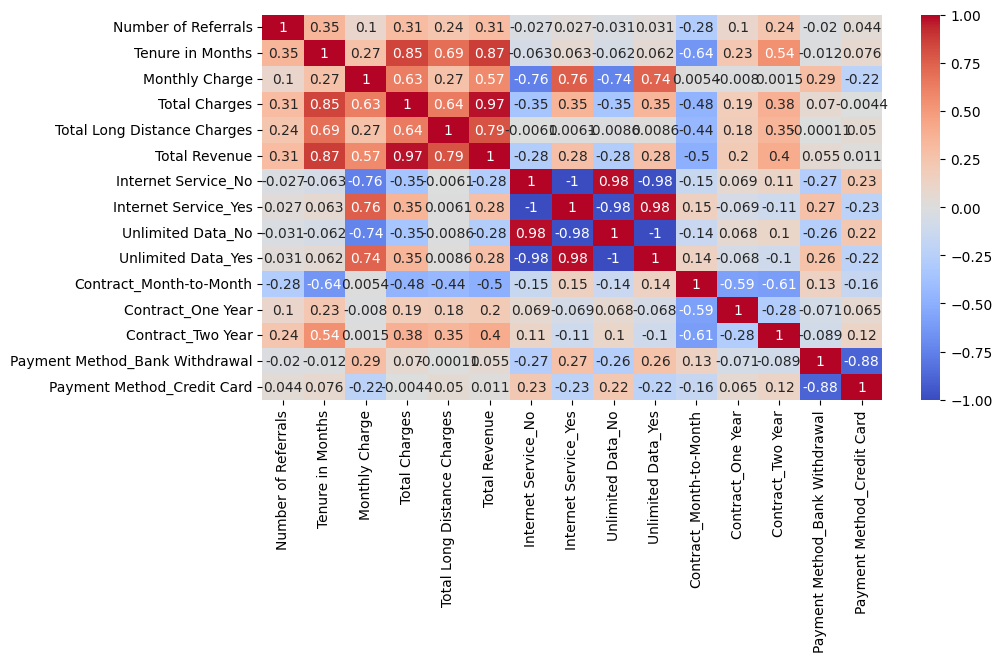

In [23]:
# Correlation between independent variables Visualization

corr_matrix = df_independent_variable.corr()
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

In [24]:
df_independent_variable = df_independent_variable.drop(columns=['Unlimited Data_No','Unlimited Data_Yes','Internet Service_No'])

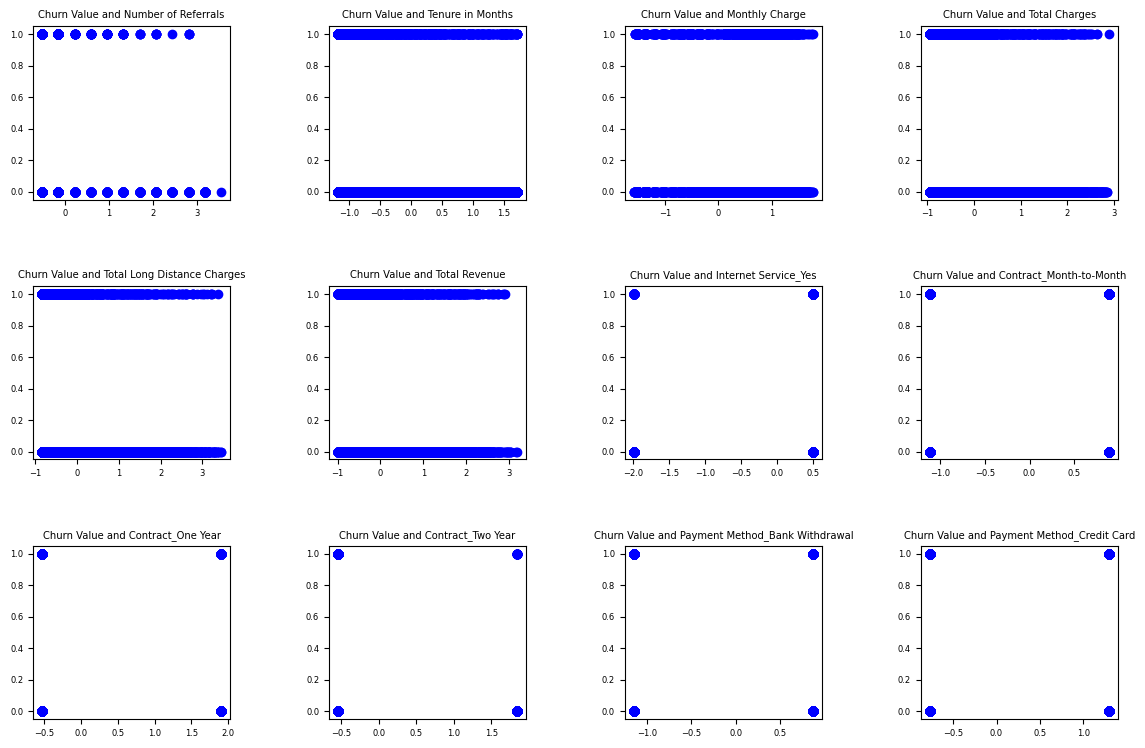

In [25]:
X_list = []
for column in df_independent_variable :
    if column != 'Customer ID':
        X_list.append(column)
X_matrix = np.array(X_list).reshape((3,4))

# Initialise the subplot function using number of rows and columns

plt.rcParams.update({'font.size': 6})
fig, ax = plt.subplots(nrows=X_matrix.shape[0], ncols=X_matrix.shape[1], figsize=(14, 9),
                       gridspec_kw={
                       'wspace': 0.5,
                       'hspace': 0.5})

for i in range(X_matrix.shape[0]):
    for j in range(X_matrix.shape[1]): 
        ax[i, j].scatter(df[X_matrix[i][j]], df['Churn Value'],c ="blue")
        ax[i, j].set_title('Churn Value and ' + str(X_matrix[i][j]))
  
# Combine all the operations and display
plt.show()

In [26]:
# sorting independent variables based on correlation 

dict_corr = {}
keys = X_list
values = [abs(df['Churn Value'].corr(df[element])) for element in X_list]
dict_corr = {k:v for k,v in zip(keys, values)}
sorted_dict_corr = sorted(dict_corr.items(), key=lambda x: x[1], reverse=True)
sorted_dict_corr

[('Contract_Month-to-Month', 0.4555956644688439),
 ('Tenure in Months', 0.3574207822359676),
 ('Contract_Two Year', 0.3325742043066047),
 ('Number of Referrals', 0.24876657197223115),
 ('Internet Service_Yes', 0.2370534560984906),
 ('Payment Method_Credit Card', 0.23087811572010375),
 ('Total Revenue', 0.2296074124282156),
 ('Total Long Distance Charges', 0.22753181979088533),
 ('Contract_One Year', 0.2113479083147107),
 ('Monthly Charge', 0.20796205971987852),
 ('Total Charges', 0.20719846157089158),
 ('Payment Method_Bank Withdrawal', 0.20326882349138162)]

In [27]:
# Changing the number of independent variables

n = 12
x_columns = []
for i in range(n):
    x_columns.append(sorted_dict_corr[i][0])
X = df[x_columns]
X

Contract_Month-to-Month  Tenure in Months  Contract_Two Year  \
0                    0.892130         -0.609501          -0.541968   
1                    0.892130         -1.179735          -0.541968   
2                    0.892130         -1.098273          -0.541968   
3                    0.892130         -0.568770          -0.541968   
4                    0.892130         -0.894618          -0.541968   
...                       ...               ...                ...   
4478                 0.892130          0.327310          -0.541968   
4479                -1.120663         -0.283654          -0.541968   
4480                 0.892130         -1.179735          -0.541968   
4481                 0.892130         -1.139004          -0.541968   
4482                -1.120663          1.467777           1.844715   

      Number of Referrals  Internet Service_Yes  Payment Method_Credit Card  \
0               -0.535800              0.502870                   -0.770783   
1               -0.163629              0.502870                   -0.770783   
2               -0.535800              0.502870                   -0.770783   
3               -0.535800              0.502870                   -0.770783   
4               -0.535800              0.502870                   -0.770783   
...                   ...                   ...                         ...   
4478            -0.535800              0.502870                    1.297093   
4479             0.580713             -1.988142                    1.297093   
4480            -0.535800              0.502870                   -0.770783   
4481            -0.535800             -1.988142                   -0.770783   
4482            -0.535800              0.502870                   -0.770783   

      Total Revenue  Total Long Distance Charges  Contract_One Year  \
0         -0.473880                    -0.313474          -0.525064   
1         -0.988690                    -0.839247          -0.525064   
2         -0.956487                    -0.839247          -0.525064   
3         -0.420980                    -0.657571          -0.525064   
4         -0.785465                    -0.822100          -0.525064   
...             ...                          ...                ...   
4478       0.378528                    -0.532224          -0.525064   
4479      -0.541622                     0.161631           1.904103   
4480      -0.969533                    -0.785086          -0.525064   
4481      -0.984227                    -0.822751          -0.525064   
4482       2.108275                     1.621177          -0.525064   

      Monthly Charge  Total Charges  Payment Method_Bank Withdrawal  
0           0.292139      -0.485158                        0.872538  
1          -0.855124      -0.943969                        0.872538  
2          -0.823256      -0.903151                        0.872538  
3           0.964731      -0.291314                        0.872538  
4           0.295494      -0.692690                        0.872538  
...              ...            ...                             ...  
4478        0.986536       0.675913                       -1.145826  
4479       -1.556230      -0.746087                       -1.145826  
4480       -0.528054      -0.939643                        0.872538  
4481       -1.531071      -0.944391                       -1.145826  
4482        1.340443       2.074974                        0.872538  

[4483 rows x 12 columns]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
X_train, X_test, Y_train, Y_test = train_test_split(X, df['Churn Score'], test_size=0.3, random_state=0)

In [29]:
# Mean Absolute Error (MAE)
def MAE(y_pred,y_test):
    mae = np.mean(abs(y_pred - y_test))
    return mae  

# Median Absolute Error (MedAE)
def MEDAE(y_pred,y_test):
    medae = np.median(abs(y_pred - y_test))
    return medae

# Mean Squared Error (MSE)
def MSE(y_pred,y_test):
    mse = np.square(np.subtract(y_pred, y_test)).mean()
    return mse

# Root Mean Squarred Error (RMSE)
def RMSE(y_pred,y_test): 
    rmse = np.sqrt(np.mean(np.square(y_pred - y_test)))
    return rmse 

In [30]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
LinearRegression_Errors = []
# reg.fit(X_train, Y_train)
# Churn_Value_hat_1 = reg.predict(X_test)

num_folds = 5 
metrics = ['neg_mean_squared_error','neg_mean_absolute_error','neg_root_mean_squared_error']
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
for metric in metrics:
    scoring_metric = metric
    scores = cross_val_score(reg, X, df['Churn Score'], cv=kf, scoring=scoring_metric)
    LinearRegression_Errors.append((-1)*np.mean(scores))

# LinearRegression_Errors.extend([MAE(Churn_Value_hat_1, Y_test), MEDAE(Churn_Value_hat_1, Y_test), MSE(Churn_Value_hat_1, Y_test), RMSE(Churn_Value_hat_1, Y_test)])
reg.fit(X_train, Y_train)
Churn_Value_hat_1 = reg.predict(X_test)
print('Errors: '+str(LinearRegression_Errors)+'\n')
print(f"intercept: {reg.intercept_}"+'\n')
print(f"slope: {reg.coef_}")

Errors: [394.3252255000849, 16.598778998370115, 19.856706882058]

intercept: 60.111039996241566

slope: [ 1.16782465e+13  4.18945312e-01  9.84876837e+12 -2.02685547e+00
 -7.03979492e-01 -2.06750488e+00 -1.13854139e+12  3.30972181e+11
  9.67651964e+12  5.97829199e+00  8.98225006e+11 -3.71948242e-01]


In [31]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
LogisticRegression_Errors = []

num_folds = 5 
metrics = ['neg_mean_squared_error','neg_mean_absolute_error','neg_root_mean_squared_error']
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
for metric in metrics:
    scoring_metric = metric
    scores = cross_val_score(logistic_regression, X, df['Churn Score'], cv=kf, scoring=scoring_metric)
    LogisticRegression_Errors.append((-1)*np.mean(scores))

logreg = logistic_regression.fit(X_train, Y_train)
Churn_Value_hat_2 = logreg.predict(X_test) 
# LogisticRegression_Errors.extend([MAE(Churn_Value_hat_2, Y_test), MEDAE(Churn_Value_hat_2, Y_test), MSE(Churn_Value_hat_2, Y_test), RMSE(Churn_Value_hat_2, Y_test)])
print('Errors: '+str(LogisticRegression_Errors)+'\n')
print(f"intercept: {logreg.intercept_}"+'\n')
print(f"slope: {logreg.coef_}")

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Errors: [803.0886098502946, 22.1330187928014, 28.334757779041325]

intercept: [-3.85836602 -3.49376201 -4.77097308  0.14471185  0.05747245  0.14778632
  0.31937962  0.1998845   0.03734983  0.44932979  0.49970737  0.35710176
  0.02709578  0.17866876  0.09208341 -0.1585046   0.15147679 -0.23421551
  0.23785289 -0.05004895  0.1423498   0.45349195  0.19301565  0.1386839
 -0.31735856  0.39526041  0.1494616  -0.16692771  0.19881619  0.48561728
  0.23840265 -0.0907095   0.23713944 -0.30913777 -0.05911014  0.34126031
 -0.04343578  0.53822864  0.41770955  0.13897682  0.17507005 -0.126404
  0.43649525  0.11273613  0.16046473  0.29623683  0.27167169  0.21054554
  0.80789241  0.92039689  0.94455682  1.11473604  0.86803542  1.01591789
  1.07018305  0.66577488  0.5808279   0.79143894  0.65643499  0.84160283
  0.82074604  0.9725286   0.88836677  1.16176839 -0.85223338  0.03097644
 -0.18687063 -0.81803214 -0.65735681 -0.4730782  -0.61436622 -1.50530148
 -0.69880737  0.23932094  0.56267681 -0.94389229 

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


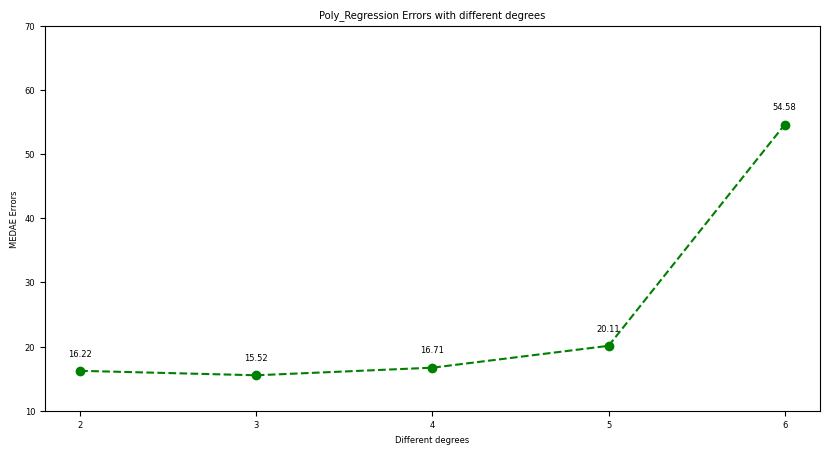

Errors: [418.9194954489737, 16.729661376583742, 20.46315567665016]

intercept: -5971149064716.112

slope: [ 1.15196189e+07 -2.27113548e+13 -5.22234364e+12 -2.17780763e+12
 -1.59350330e+12 -2.38774905e+12  1.06323942e+12  3.98252488e+12
 -8.44400550e+11 -1.29922856e+13 -7.38278918e+12  4.15366156e+12
  2.97175836e+12  3.11651402e+12  3.92238229e+12  3.79272523e+12
  1.15771931e+12  7.22420629e+11  1.95496706e+12  5.71557662e+12
 -2.46020565e+11 -6.35258264e+12  3.36067995e+12 -1.33982893e+12
  6.64941108e+11 -6.34094038e+01 -4.68522881e+12 -1.66276955e+00
  4.99404093e+11  5.91005436e+11  1.40556389e+11 -4.08595199e+10
  3.30213462e+12 -8.19130859e+01 -1.10888602e+11  1.12696724e+12
 -1.11545411e+13 -3.28754192e+11 -8.31536923e+11  3.28121068e+12
 -3.39643517e+11  7.10021687e+11 -7.18040955e+12  5.85665829e+11
  1.41846439e+12 -2.72248455e+11 -8.13378906e+00 -8.15034764e+11
  6.82694042e+11 -4.56775751e+11  1.32783989e+11  3.14433840e+10
  3.30075073e+00  3.60362308e+11  3.38984528e+11 

In [32]:
from sklearn.preprocessing import PolynomialFeatures
degrees = [2,3,4,5,6]
different_degree_errors = []
PolynominalRegression_Errors = []
for degree in degrees :
    regressor = linear_model.LinearRegression()
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)
    regressor.fit(X_poly, Y_train)
    Churn_Value_hat_3 = regressor.predict(poly.fit_transform(X_test))
    different_degree_errors.append(MEDAE(Churn_Value_hat_3, Y_test))
fig = plt.figure(figsize = (10, 5))
plt.scatter(degrees, different_degree_errors, color='green', marker='o')
plt.plot(degrees, different_degree_errors, color='green' ,linestyle='--')
for i, (x, y) in enumerate(zip(degrees, different_degree_errors)):
    plt.text(x, y+2, f'{y:.2f}', ha='center', va='bottom', color='black')
plt.title('Poly_Regression Errors with different degrees')
plt.xlabel('Different degrees')
plt.ylabel('MEDAE Errors')
plt.ylim((10,70))
plt.gca().xaxis.set_major_locator(MultipleLocator(base=1))
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 1), ha='center', va='bottom', color='black')
plt.show()

poly_regressor = linear_model.LinearRegression()
poly = PolynomialFeatures(degree=degrees[different_degree_errors.index(min(different_degree_errors))])
X_poly = poly.fit_transform(X_train)

num_folds = 5 
metrics = ['neg_mean_squared_error','neg_mean_absolute_error','neg_root_mean_squared_error']
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
for metric in metrics:
    scoring_metric = metric
    scores = cross_val_score(poly_regressor, poly.fit_transform(X), df['Churn Score'], cv=kf, scoring=scoring_metric)
    PolynominalRegression_Errors.append((-1)*np.mean(scores))

poly_regressor.fit(X_poly, Y_train)
Churn_Value_hat_3 = poly_regressor.predict(poly.fit_transform(X_test))
#PolynominalRegression_Errors.extend([MAE(Churn_Value_hat_3, Y_test), MEDAE(Churn_Value_hat_3, Y_test), MSE(Churn_Value_hat_3, Y_test), RMSE(Churn_Value_hat_3, Y_test)])
print('Errors: '+str(PolynominalRegression_Errors)+'\n')
print(f"intercept: {poly_regressor.intercept_}"+'\n')
print(f"slope: {poly_regressor.coef_}")

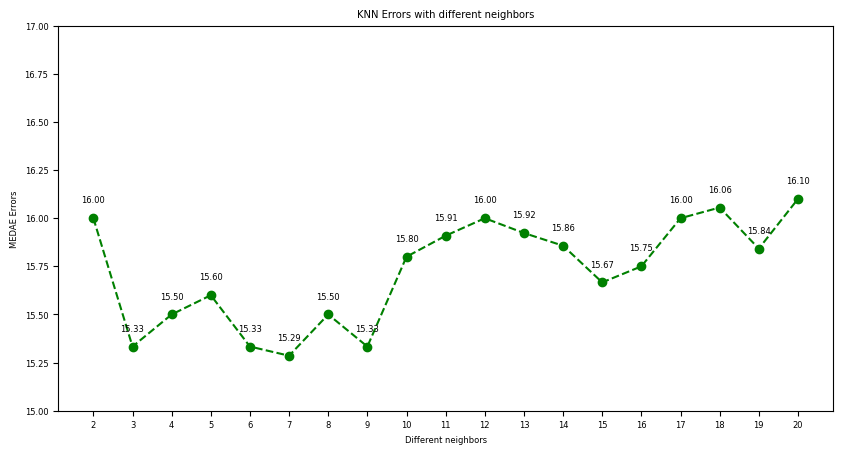

Errors: [436.1938275889668, 17.178385007849293, 20.88344249112263]

Number of Neighbors: 7



In [33]:
from sklearn.neighbors import KNeighborsRegressor
KNN_Errors = []
number_neighbor = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
different_neighbor_errors = []
for num_neigh in number_neighbor:
    knn = KNeighborsRegressor(n_neighbors=num_neigh, metric='euclidean')
    knn.fit(X_train, Y_train)
    Churn_Value_hat_4 = knn.predict(X_test)
    different_neighbor_errors.append(MEDAE(Churn_Value_hat_4, Y_test))
fig = plt.figure(figsize = (10, 5))
plt.scatter(number_neighbor, different_neighbor_errors, color='green', marker='o')
plt.plot(number_neighbor, different_neighbor_errors, color ='green' ,linestyle='--')
for i, (x, y) in enumerate(zip(number_neighbor, different_neighbor_errors)):
    plt.text(x, y+0.07, f'{y:.2f}', ha='center', va='bottom', color='black')
plt.title('KNN Errors with different neighbors')
plt.xlabel('Different neighbors')
plt.ylabel('MEDAE Errors')
plt.ylim((15,17))
plt.gca().xaxis.set_major_locator(MultipleLocator(base=1))
plt.show()

knn = KNeighborsRegressor(n_neighbors=number_neighbor[different_neighbor_errors.index(min(different_neighbor_errors))], metric='euclidean')

num_folds = 5 
metrics = ['neg_mean_squared_error','neg_mean_absolute_error','neg_root_mean_squared_error']
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
for metric in metrics:
    scoring_metric = metric
    scores = cross_val_score(knn, X, df['Churn Score'], cv=kf, scoring=scoring_metric)
    KNN_Errors.append((-1)*np.mean(scores))

knn.fit(X_train, Y_train)
Churn_Value_hat_4 = knn.predict(X_test)
# KNN_Errors.extend([MAE(Churn_Value_hat_4, Y_test), MEDAE(Churn_Value_hat_4, Y_test), MSE(Churn_Value_hat_4, Y_test), RMSE(Churn_Value_hat_4, Y_test)])
print('Errors: '+str(KNN_Errors)+'\n')
print('Number of Neighbors: '+str(number_neighbor[different_neighbor_errors.index(min(different_neighbor_errors))])+'\n')

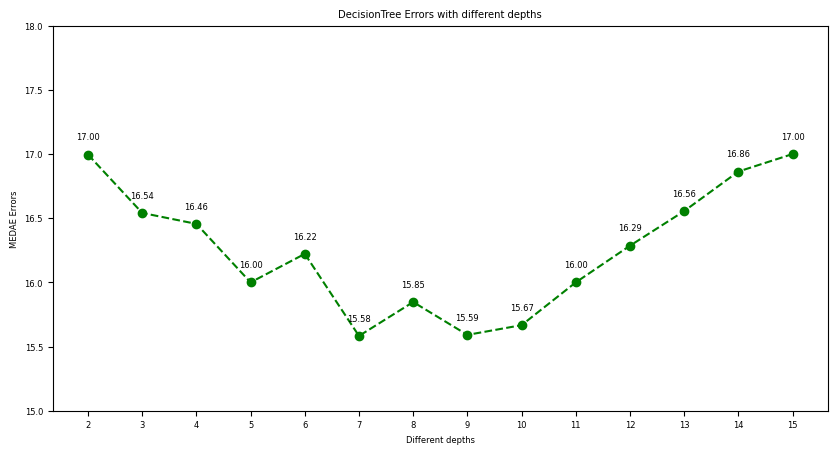

Errors: [431.2395254625806, 17.001517084362277, 20.749870511531938]

Number of Depths: 7



In [34]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_Errors = []
number_depths = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
different_depths_errors = []
for num_depth in number_depths:
    tree = DecisionTreeRegressor(max_depth=num_depth)
    tree.fit(X_train, Y_train)
    Churn_Value_hat_5 = tree.predict(X_test)
    different_depths_errors.append(MEDAE(Churn_Value_hat_5, Y_test))
fig = plt.figure(figsize = (10, 5))
plt.scatter(number_depths, different_depths_errors, color='green', marker='o')
plt.plot(number_depths, different_depths_errors, color ='green' ,linestyle='--')
for i, (x, y) in enumerate(zip(number_depths, different_depths_errors)):
    plt.text(x, y+0.1, f'{y:.2f}', ha='center', va='bottom', color='black')
plt.title('DecisionTree Errors with different depths')
plt.xlabel('Different depths')
plt.ylabel('MEDAE Errors')
plt.ylim((15,18))
plt.gca().xaxis.set_major_locator(MultipleLocator(base=1))
plt.show()

tree = DecisionTreeRegressor(max_depth=number_depths[different_depths_errors.index(min(different_depths_errors))])

num_folds = 5 
metrics = ['neg_mean_squared_error','neg_mean_absolute_error','neg_root_mean_squared_error']
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
for metric in metrics:
    scoring_metric = metric
    scores = cross_val_score(tree, X, df['Churn Score'], cv=kf, scoring=scoring_metric)
    DecisionTree_Errors.append((-1)*np.mean(scores))

tree.fit(X_train, Y_train)
Churn_Value_hat_5 = tree.predict(X_test)
# DecisionTree_Errors.extend([MAE(Churn_Value_hat_5, Y_test), MEDAE(Churn_Value_hat_5, Y_test), MSE(Churn_Value_hat_5, Y_test), RMSE(Churn_Value_hat_5, Y_test)])
print('Errors: '+str(DecisionTree_Errors)+'\n')
print('Number of Depths: '+str(number_depths[different_depths_errors.index(min(different_depths_errors))])+'\n')

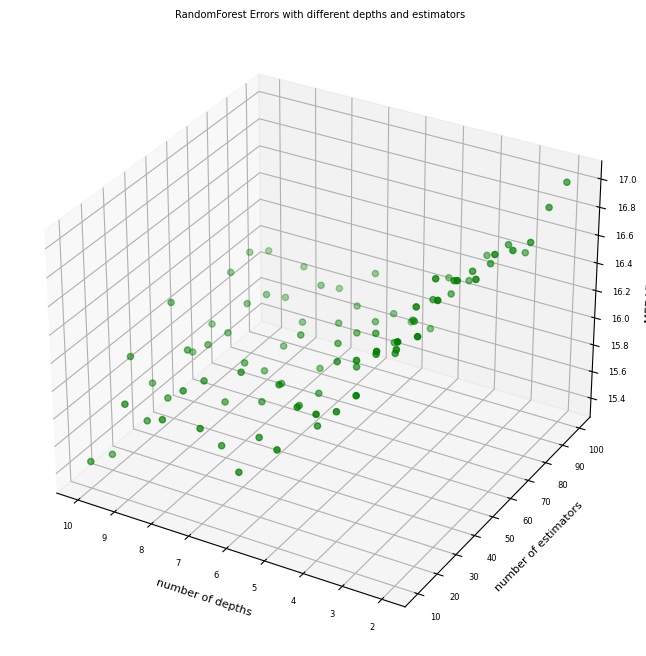

Errors: [399.59613163401764, 16.526856315559407, 20.070928725131765]

Number of Depths: 10

Number of Estimators: 20



In [35]:
from sklearn.ensemble import RandomForestRegressor
from mpl_toolkits.mplot3d import Axes3D
RandomForest_Errors = []
number_estimators = [10,20,30,40,50,60,70,80,90,100]
number_estimators_x = []
number_depths = [2,3,4,5,6,7,8,9,10]
number_depths_x = []
different_depths_estimators_errors = []
for num_estimator in number_estimators:
    for num_depth in number_depths:
        rf = RandomForestRegressor(n_estimators=num_estimator, max_depth=num_depth)
        rf.fit(X_train, Y_train)
        Churn_Value_hat_6 = rf.predict(X_test)
        different_depths_estimators_errors.append(MEDAE(Churn_Value_hat_6, Y_test))
        number_depths_x.append(num_depth)
        number_estimators_x.append(num_estimator)
fig = plt.figure(figsize=(8, 12))
ax = plt.axes(projection='3d')
ax.scatter(number_depths_x, number_estimators_x, different_depths_estimators_errors, marker='o', c='green')
ax.set_title('RandomForest Errors with different depths and estimators')
ax.set_xlabel('number of depths', fontsize=8)
ax.set_ylabel('number of estimators', fontsize=8)
ax.set_zlabel('MEDAE Errors', fontsize=8)
ax.invert_xaxis()
plt.gca().yaxis.set_major_locator(MultipleLocator(base=10))
plt.show()

rf = RandomForestRegressor(n_estimators=number_estimators_x[different_depths_estimators_errors.index(min(different_depths_estimators_errors))], max_depth=number_depths_x[different_depths_estimators_errors.index(min(different_depths_estimators_errors))])

num_folds = 5 
metrics = ['neg_mean_squared_error','neg_mean_absolute_error','neg_root_mean_squared_error']
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
for metric in metrics:
    scoring_metric = metric
    scores = cross_val_score(rf, X, df['Churn Score'], cv=kf, scoring=scoring_metric)
    RandomForest_Errors.append((-1)*np.mean(scores))

rf.fit(X_train, Y_train)
Churn_Value_hat_6 = rf.predict(X_test)
# RandomForest_Errors.extend([MAE(Churn_Value_hat_6, Y_test), MEDAE(Churn_Value_hat_6, Y_test), MSE(Churn_Value_hat_6, Y_test), RMSE(Churn_Value_hat_6, Y_test)])
print('Errors: '+str(RandomForest_Errors)+'\n')
print('Number of Depths: '+str(number_depths_x[different_depths_estimators_errors.index(min(different_depths_estimators_errors))])+'\n')
print('Number of Estimators: '+str(number_estimators_x[different_depths_estimators_errors.index(min(different_depths_estimators_errors))])+'\n')

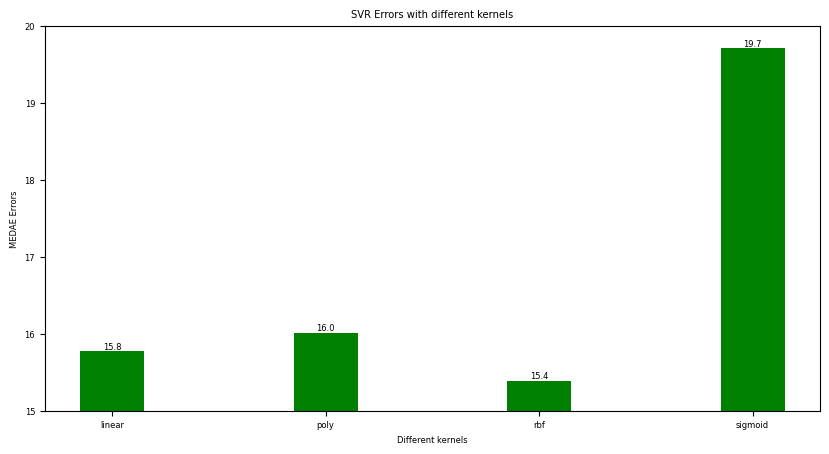

Errors: [394.0404649217541, 16.238467953662674, 19.84969265114234]

Best kernel: rbf

intercept: [55.08982315]

coef: [[-1.  1. -1. ...  1.  1. -1.]]



In [36]:
from sklearn.svm import SVR
SVR_Errors = []
kernels = ['linear','poly','rbf','sigmoid']
different_kernels_errors = []
for kernel in kernels:
    svm_reg = SVR(kernel=kernel)
    svm_reg.fit(X_train, Y_train)
    Churn_Value_hat_7 = svm_reg.predict(X_test)
    different_kernels_errors.append(MEDAE(Churn_Value_hat_7, Y_test))
fig = plt.figure(figsize = (10, 5))
column_width = 0.3  
bars = plt.bar(kernels, different_kernels_errors, color='green', width=column_width)
plt.title('SVR Errors with different kernels')
plt.xlabel('Different kernels')
plt.ylabel('MEDAE Errors')
plt.ylim((15,20))
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 1), ha='center', va='bottom', color='black')
plt.show()

svm_reg = SVR(kernel=kernels[different_kernels_errors.index(min(different_kernels_errors))])

num_folds = 5 
metrics = ['neg_mean_squared_error','neg_mean_absolute_error','neg_root_mean_squared_error']
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
for metric in metrics:
    scoring_metric = metric
    scores = cross_val_score(svm_reg, X, df['Churn Score'], cv=kf, scoring=scoring_metric)
    SVR_Errors.append((-1)*np.mean(scores))

svm_reg.fit(X_train, Y_train)
Churn_Value_hat_7 = svm_reg.predict(X_test)
# SVR_Errors.extend([MAE(Churn_Value_hat_7, Y_test), MEDAE(Churn_Value_hat_7, Y_test), MSE(Churn_Value_hat_7, Y_test), RMSE(Churn_Value_hat_7, Y_test)])
print('Errors: '+str(SVR_Errors)+'\n')
print('Best kernel: '+str(kernels[different_kernels_errors.index(min(different_kernels_errors))])+'\n')
print(f"intercept: {svm_reg.intercept_}"+'\n')
print(f"coef: {svm_reg.dual_coef_}"+'\n')

Epoch 1/50
99/99 [==============================] - 3s 5ms/step - loss: 3966.3894
Epoch 2/50
99/99 [==============================] - 0s 5ms/step - loss: 3959.6763
Epoch 3/50
99/99 [==============================] - 0s 4ms/step - loss: 3957.4966
Epoch 4/50
99/99 [==============================] - 0s 4ms/step - loss: 3956.2661
Epoch 5/50
99/99 [==============================] - 0s 4ms/step - loss: 3955.4897
Epoch 6/50
99/99 [==============================] - 0s 4ms/step - loss: 3954.9663
Epoch 7/50
99/99 [==============================] - 0s 4ms/step - loss: 3954.5942
Epoch 8/50
99/99 [==============================] - 0s 4ms/step - loss: 3954.3208
Epoch 9/50
99/99 [==============================] - 0s 4ms/step - loss: 3954.1121
Epoch 10/50
99/99 [==============================] - 0s 4ms/step - loss: 3953.9480
Epoch 11/50
99/99 [==============================] - 0s 4ms/step - loss: 3953.8206
Epoch 12/50
99/99 [==============================] - 0s 4ms/step - loss: 3953.7139
Epoch 13/50
9

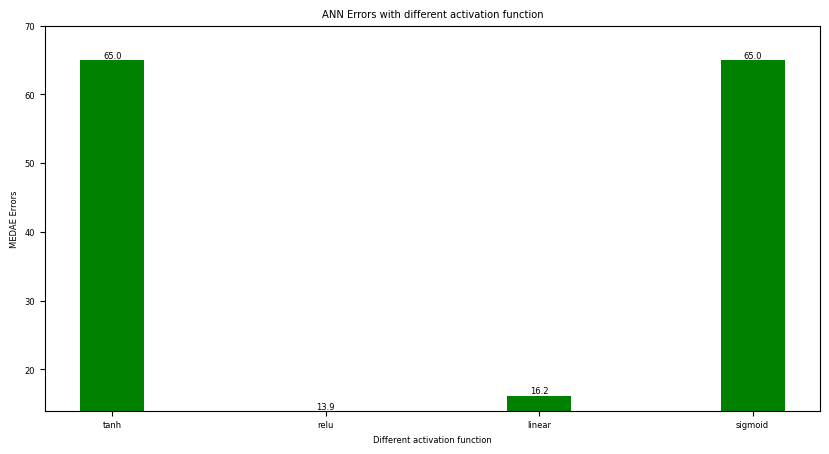

Best Activation Function: relu



In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
functions = ['tanh','relu','linear','sigmoid']
different_funcs_errors = []
for func in functions:
    model = Sequential()
    model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(256, activation=func))
    model.add(Dense(128, activation=func))
    model.add(Dense(64, activation=func))
    model.add(Dense(32, activation=func))
    model.add(Dense(16, activation=func))
    model.add(Dense(8, activation=func))
    model.add(Dense(4, activation=func))
    model.add(Dense(2, activation=func))
    model.add(Dense(1, activation=func))
    model.compile(loss='mean_squared_error', optimizer='adam')
    early_stopping = EarlyStopping(monitor='loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
    model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1, callbacks=[early_stopping])
    Churn_Value_hat_8 = np.array(model.predict(X_test)).flatten().tolist()
    different_funcs_errors.append(MEDAE(Churn_Value_hat_8, Y_test))
fig = plt.figure(figsize = (10, 5))
column_width = 0.3  
bars = plt.bar(functions, different_funcs_errors, color='green', width=column_width)
plt.title('ANN Errors with different activation function')
plt.xlabel('Different activation function')
plt.ylabel('MEDAE Errors')
plt.ylim((14,70))
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 1), ha='center', va='bottom', color='black')
plt.show()

print('Best Activation Function: '+str(functions[different_funcs_errors.index(min(different_funcs_errors))])+'\n')

In [38]:
neurons_list = [2,4,6,8,10,12]
layers_list = [2,4,6,8,10,12]
num_layers = []
num_neurons = []
different_layers_neurons_Errors = []

for layer in layers_list:
    for neuron in neurons_list:
        model = Sequential()
        model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
        for _ in range(layer):
            model.add(Dense(neuron, activation=functions[different_funcs_errors.index(min(different_funcs_errors))]))
        model.add(Dense(1, activation=functions[different_funcs_errors.index(min(different_funcs_errors))]))
        model.compile(loss='mean_squared_error', optimizer='adam')
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
        history = model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1, callbacks=[early_stopping])
        Churn_Value_hat_8 = np.array(model.predict(X_test)).flatten().tolist()
        num_layers.append(layer)
        num_neurons.append(neuron)
        different_layers_neurons_Errors.append(history.history['loss'][-1])

Epoch 1/50
99/99 [==============================] - 1s 2ms/step - loss: 3448.7273
Epoch 2/50
99/99 [==============================] - 0s 2ms/step - loss: 952.9503
Epoch 3/50
99/99 [==============================] - 0s 2ms/step - loss: 493.4092
Epoch 4/50
99/99 [==============================] - 0s 2ms/step - loss: 419.4501
Epoch 5/50
99/99 [==============================] - 0s 2ms/step - loss: 398.6967
Epoch 6/50
99/99 [==============================] - 0s 2ms/step - loss: 387.4975
Epoch 7/50
99/99 [==============================] - 0s 2ms/step - loss: 384.5670
Epoch 8/50
99/99 [==============================] - 0s 2ms/step - loss: 380.7492
Epoch 9/50
99/99 [==============================] - 0s 2ms/step - loss: 378.4126
Epoch 10/50
99/99 [==============================] - 0s 2ms/step - loss: 376.9808
Epoch 11/50
99/99 [==============================] - 0s 2ms/step - loss: 375.2758
Epoch 12/50
99/99 [==============================] - 0s 2ms/step - loss: 375.2762
Epoch 13/50
99/99 [=====

In [39]:
print('Best Error: '+str(min(different_layers_neurons_Errors))+'\n')
print('Number of layers: '+str(num_layers[different_layers_neurons_Errors.index(min(different_layers_neurons_Errors))])+'\n')
print('Number of neurons: '+str(num_neurons[different_layers_neurons_Errors.index(min(different_layers_neurons_Errors))])+'\n')

Best Error: 363.1506652832031

Number of layers: 2

Number of neurons: 4



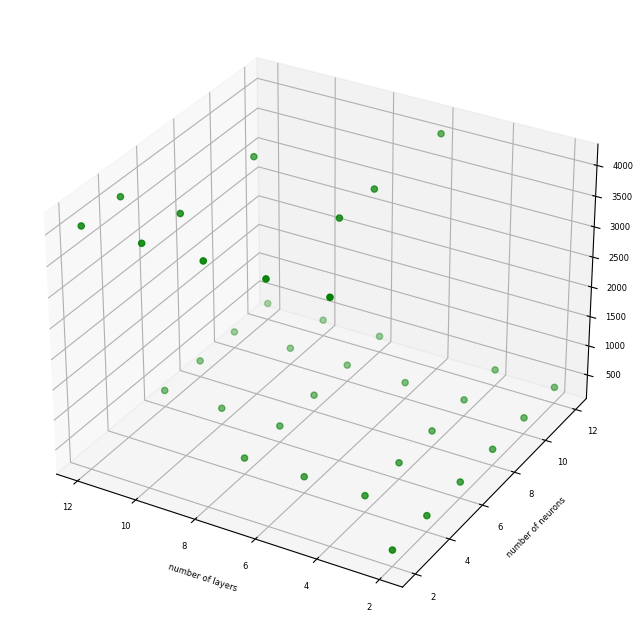

In [40]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MultipleLocator

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(num_layers, num_neurons, different_layers_neurons_Errors, c='green', marker='o')

# Set labels for the axes
ax.set_xlabel('number of layers')
ax.set_ylabel('number of neurons')
ax.set_zlabel('Errors')

ax.yaxis.set_major_locator(MultipleLocator(base=2))
ax.invert_xaxis()

plt.show()

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
ANN_Errors = []

ANN_MAE = []
ANN_MSE = []
ANN_RMSE = []
# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, df['Churn Score']):

    # Define the model architecture
    model = Sequential()
    model.add(Dense(6, input_dim=X_train.shape[1], activation='linear'))
    for _ in range(num_layers[different_layers_neurons_Errors.index(min(different_layers_neurons_Errors))]):
        model.add(Dense(num_neurons[different_layers_neurons_Errors.index(min(different_layers_neurons_Errors))], activation=functions[different_funcs_errors.index(min(different_funcs_errors))]))
    model.add(Dense(1, activation=functions[different_funcs_errors.index(min(different_funcs_errors))]))    
    model.compile(loss='mean_squared_error', optimizer='adam')
    early_stopping = EarlyStopping(monitor='loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
    # model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1, callbacks=[early_stopping])

    # Fit data to model
    history = model.fit(X.iloc[train], df['Churn Score'][train],
                batch_size=16,
                epochs=40,
                verbose=1,
                callbacks=[early_stopping])
    
    predictions = model.predict(X.iloc[test])
    ANN_MSE.append(history.history['loss'][-1])
    ANN_MAE.append(mean_absolute_error(df['Churn Score'][test], predictions))
    ANN_RMSE.append(np.sqrt(history.history['loss'][-1]))

    fold_no = fold_no + 1
ANN_Errors.extend([np.mean(ANN_MSE),np.mean(ANN_MAE),np.mean(ANN_RMSE)])

# model = Sequential()
# model.add(Dense(512, input_dim=X_train.shape[1], activation='linear'))
# for _ in range(num_layers[different_layers_neurons_Errors.index(min(different_layers_neurons_Errors))]):
#     model.add(Dense(num_neurons[different_layers_neurons_Errors.index(min(different_layers_neurons_Errors))], activation=functions[different_funcs_errors.index(min(different_funcs_errors))]))
# model.add(Dense(1, activation=functions[different_funcs_errors.index(min(different_funcs_errors))]))
# model.compile(loss='mean_squared_error', optimizer='adam')
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
# model.fit(X_train, Y_train, epochs=60, batch_size=32, verbose=1, callbacks=[early_stopping])
# Churn_Value_hat_8 = np.array(model.predict(X_test)).flatten().tolist()

Epoch 1/40
225/225 [==============================] - 1s 2ms/step - loss: 4017.3115
Epoch 2/40
225/225 [==============================] - 0s 2ms/step - loss: 2767.1521
Epoch 3/40
225/225 [==============================] - 0s 2ms/step - loss: 1794.8899
Epoch 4/40
225/225 [==============================] - 0s 2ms/step - loss: 1325.7666
Epoch 5/40
225/225 [==============================] - 0s 2ms/step - loss: 846.4037
Epoch 6/40
225/225 [==============================] - 0s 2ms/step - loss: 683.3337
Epoch 7/40
225/225 [==============================] - 0s 2ms/step - loss: 555.2739
Epoch 8/40
225/225 [==============================] - 0s 2ms/step - loss: 471.0044
Epoch 9/40
225/225 [==============================] - 0s 2ms/step - loss: 431.1423
Epoch 10/40
225/225 [==============================] - 0s 2ms/step - loss: 416.0113
Epoch 11/40
225/225 [==============================] - 0s 2ms/step - loss: 409.3868
Epoch 12/40
225/225 [==============================] - 0s 2ms/step - loss: 406.86

In [42]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='linear'))
for _ in range(num_layers[different_layers_neurons_Errors.index(min(different_layers_neurons_Errors))]):
    model.add(Dense(num_neurons[different_layers_neurons_Errors.index(min(different_layers_neurons_Errors))], activation=functions[different_funcs_errors.index(min(different_funcs_errors))]))
model.add(Dense(1, activation=functions[different_funcs_errors.index(min(different_funcs_errors))]))
model.compile(loss='mean_squared_error', optimizer='adam')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
model.fit(X_train, Y_train, epochs=60, batch_size=32, verbose=1, callbacks=[early_stopping])
Churn_Value_hat_8 = np.array(model.predict(X_test)).flatten().tolist()

Epoch 1/60
99/99 [==============================] - 1s 2ms/step - loss: 3818.1555
Epoch 2/60
99/99 [==============================] - 0s 2ms/step - loss: 2716.7380
Epoch 3/60
99/99 [==============================] - 0s 2ms/step - loss: 1261.6044
Epoch 4/60
99/99 [==============================] - 0s 2ms/step - loss: 994.4838
Epoch 5/60
99/99 [==============================] - 0s 2ms/step - loss: 875.6747
Epoch 6/60
99/99 [==============================] - 0s 2ms/step - loss: 734.8980
Epoch 7/60
99/99 [==============================] - 0s 2ms/step - loss: 612.0901
Epoch 8/60
99/99 [==============================] - 0s 2ms/step - loss: 517.2678
Epoch 9/60
99/99 [==============================] - 0s 2ms/step - loss: 453.1229
Epoch 10/60
99/99 [==============================] - 0s 2ms/step - loss: 418.2563
Epoch 11/60
99/99 [==============================] - 0s 2ms/step - loss: 399.4959
Epoch 12/60
99/99 [==============================] - 0s 2ms/step - loss: 388.2546
Epoch 13/60
99/99 [===

In [44]:
neuron_data = []

for layer_index, layer in enumerate(model.layers):
    if hasattr(layer, 'weights'):
        weights, biases = layer.get_weights()
        num_neuron = weights.shape[1]

        for neuron_index in range(num_neuron):
            neuron_weights = weights[:, neuron_index]
            neuron_biases = biases[neuron_index]
            neuron_data.append({
                'Layer Index': layer_index,
                'Neuron Index': neuron_index,
                'Weights': neuron_weights,
                'Biases': neuron_biases
            })

df_ann = pd.DataFrame(neuron_data)

excel_filename = r"C:\Users\User\Desktop\پروژه کاشناسی\فاز دوم پروژه\ann_weights_and_biases.xlsx"
df_ann.to_excel(excel_filename, index=False)

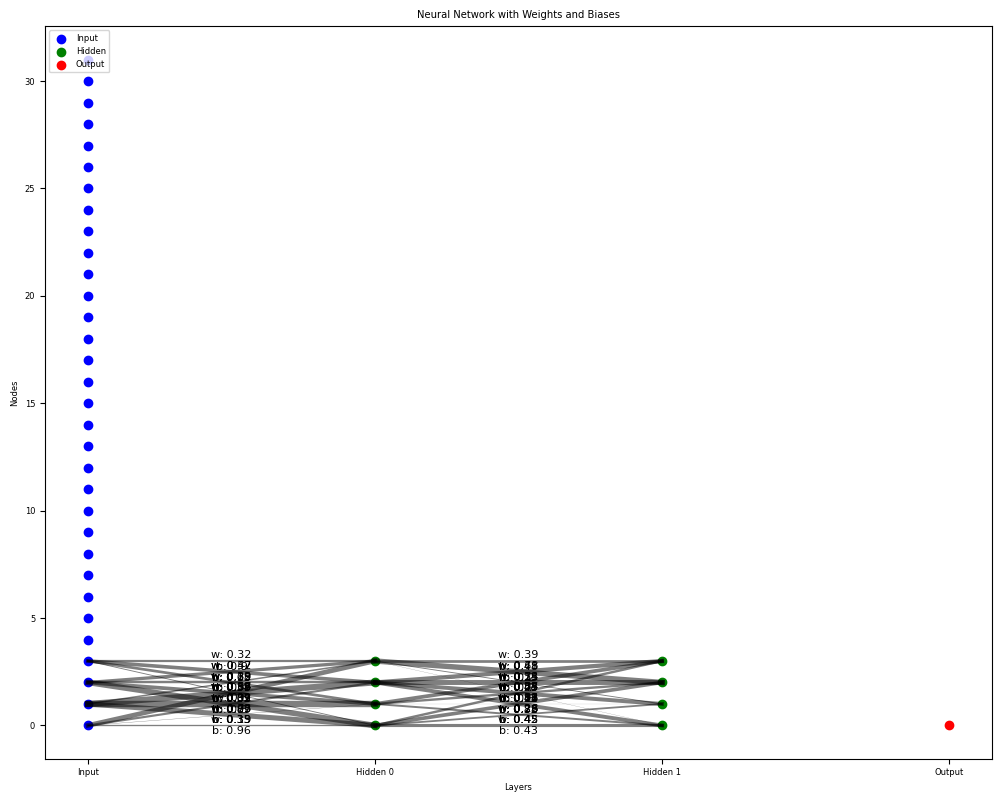

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Neural network architecture
input_nodes = 32
hidden_layers = num_layers[different_layers_neurons_Errors.index(min(different_layers_neurons_Errors))]
nodes_per_hidden_layer = num_neurons[different_layers_neurons_Errors.index(min(different_layers_neurons_Errors))]
output_nodes = 1

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Draw input layer
for i in range(input_nodes):
    ax.scatter(0, i, color='blue', label='Input' if i == 0 else '')

# Draw hidden layers with weights and biases
for layer in range(hidden_layers):
    x = layer + 1
    for node in range(nodes_per_hidden_layer):
        y = node
        ax.scatter(x, y, color='green', label='Hidden' if layer == 0 and node == 0 else '')
        for prev_node in range(nodes_per_hidden_layer):
            weight = round(np.random.uniform(), 2)
            bias = round(np.random.uniform(), 2)
            ax.plot([x - 1, x], [prev_node, node], color='black', linewidth=weight * 5, alpha=0.5)
            ax.text((x - 1 + x) * 0.5, (prev_node + node) * 0.5, f'w: {weight}\nb: {bias}', ha='center', va='center', fontsize=8)

# Draw output layer
for i in range(output_nodes):
    ax.scatter(hidden_layers + 1, i, color='red', label='Output' if i == 0 else '')

# Set labels and title
ax.set_xticks(list(range(hidden_layers + 2)))
ax.set_xticklabels(['Input'] + [f'Hidden {i}' for i in range(hidden_layers)] + ['Output'])
ax.set_xlabel('Layers')
ax.set_ylabel('Nodes')
ax.set_title('Neural Network with Weights and Biases')

# Add legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper left')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from graphviz import Digraph

# Define the neural network architecture
input_nodes = 32
hidden_layers = num_layers[different_layers_neurons_Errors.index(min(different_layers_neurons_Errors))]
nodes_per_hidden_layer = num_neurons[different_layers_neurons_Errors.index(min(different_layers_neurons_Errors))]
output_nodes = 1

# Create a directed graph
G = Digraph(format='png')

# Add input layer nodes
for i in range(input_nodes):
    G.node(f'Input_{i}', label=f'Input {i}')

# Add hidden layers
for layer in range(hidden_layers):
    for i in range(nodes_per_hidden_layer):
        G.node(f'Hidden_{layer}_{i}', label=f'Hidden {layer}_{i}')

# Add output layer nodes
for i in range(output_nodes):
    G.node(f'Output_{i}', label=f'Output {i}')

# Connect nodes and add weights and biases as labels
for layer in range(hidden_layers + 1):
    if layer == 0:
        prev_nodes = input_nodes
    elif layer == hidden_layers:
        prev_nodes = nodes_per_hidden_layer
    else:
        prev_nodes = nodes_per_hidden_layer
    
    for i in range(prev_nodes):
        for j in range(nodes_per_hidden_layer):
            weight = round(np.random.uniform(), 2)
            bias = round(np.random.uniform(), 2)
            G.edge(f'Hidden_{layer-1}_{i}', f'Hidden_{layer}_{j}', label=f'w: {weight}, b: {bias}')

# Visualize the graph
G.view(filename='neural_network', cleanup=True, directory='./')


'neural_network.png'

In [47]:
from ann_visualizer.visualize import ann_viz
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Visualize the model architecture
ann_viz(model, title="Neural Network Architecture")


In [48]:
print('Errors: '+str(ANN_Errors)+'\n')

Errors: [383.8892761230469, 16.48185597097803, 19.59302614227587]



In [49]:
print('Weights: '+str(model.weights)+'\n')

Weights: [<tf.Variable 'dense_384/kernel:0' shape=(12, 32) dtype=float32, numpy=
array([[ 1.44549623e-01,  9.04737532e-01,  4.17848527e-01,
         6.01117134e-01, -7.67742038e-01,  5.35203576e-01,
        -3.49024206e-01,  6.18254721e-01,  2.60116637e-01,
         4.80395377e-01, -2.02317566e-01,  8.10262740e-01,
        -9.06958163e-01,  1.43559352e-01,  5.83530486e-01,
        -6.05132729e-02,  4.94693249e-01,  8.17069590e-01,
        -1.83092579e-01,  4.13087040e-01, -4.29403514e-01,
         3.33567351e-01,  2.65047163e-01,  9.40660536e-01,
        -7.16155648e-01, -6.68598190e-02,  4.22217578e-01,
         3.66782248e-01,  4.56451535e-01,  8.79849732e-01,
        -8.07810426e-01,  6.90796793e-01],
       [-1.00347064e-01, -3.34857881e-01,  2.00784840e-02,
        -1.44668790e-02, -4.78369277e-03,  1.64108157e-01,
         2.19457939e-01, -2.80193597e-01, -1.72976717e-01,
        -2.30104610e-01,  3.94799739e-01,  1.26364917e-01,
         3.56501549e-01, -2.13003889e-01, -1.68953

In [50]:
Errors_dict = {
              'Linear Regression':LinearRegression_Errors, 
              'Logistic Regression':LogisticRegression_Errors, 
              'Polynomial Regression':PolynominalRegression_Errors,
              'KNN': KNN_Errors,
              'Decision Tree': DecisionTree_Errors,
              'Random Forest': RandomForest_Errors,
              'SVR': SVR_Errors,
              'ANN': ANN_Errors
              }
Errors_df = pd.DataFrame(Errors_dict, index=['MSE', 'MAE', 'RMSE'])
Errors_df.to_excel(r'C:\Users\User\Desktop\پروژه کاشناسی\فاز دوم پروژه\Errors_Results.xlsx')

C:\Users\User\AppData\Local\Temp\ipykernel_11084\855606188.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('Blues')


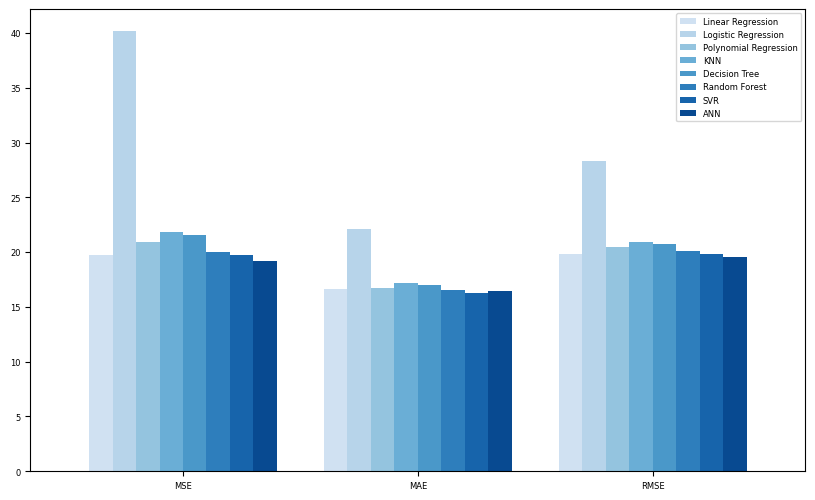

In [51]:
import matplotlib.cm as cm

Errors_df.iloc[0] = Errors_df.iloc[0] / 20
color_map = cm.get_cmap('Blues')
colors = color_map([(i+1)/10 for i in range(1,len(Errors_df.columns)+1)])
ax = Errors_df.plot.bar(rot=0, width=0.8 , figsize=(10,6) ,color=colors)

In [52]:
coef = reg.coef_
intercept = reg.intercept_
# Construct the equation
equation = 'y = ' + str(intercept)
for i in range(len(coef)):
    equation += ' + (' + str(coef[i]) + ' * X' + str(i+1) + ')'  
# Print the equation
print('Regression equation:')
print(equation)

Regression equation:
y = 60.111039996241566 + (11678246534738.979 * X1) + (0.4189453125 * X2) + (9848768372349.59 * X3) + (-2.02685546875 * X4) + (-0.7039794921875 * X5) + (-2.0675048828125 * X6) + (-1138541387740.6753 * X7) + (330972180774.1035 * X8) + (9676519636728.494 * X9) + (5.978291988372803 * X10) + (898225006007.2971 * X11) + (-0.3719482421875 * X12)


In [53]:
coef = logreg.coef_[0]
intercept = logreg.intercept_
# Construct the equation
equation = 'y = ' + str(intercept)
for i in range(len(coef)):
    equation += ' + (' + str(coef[i]) + ' * X' + str(i+1) + ')'   
# Print the equation
print('Logistic regression equation:')
print(equation)

Logistic regression equation:
y = [-3.85836602 -3.49376201 -4.77097308  0.14471185  0.05747245  0.14778632
  0.31937962  0.1998845   0.03734983  0.44932979  0.49970737  0.35710176
  0.02709578  0.17866876  0.09208341 -0.1585046   0.15147679 -0.23421551
  0.23785289 -0.05004895  0.1423498   0.45349195  0.19301565  0.1386839
 -0.31735856  0.39526041  0.1494616  -0.16692771  0.19881619  0.48561728
  0.23840265 -0.0907095   0.23713944 -0.30913777 -0.05911014  0.34126031
 -0.04343578  0.53822864  0.41770955  0.13897682  0.17507005 -0.126404
  0.43649525  0.11273613  0.16046473  0.29623683  0.27167169  0.21054554
  0.80789241  0.92039689  0.94455682  1.11473604  0.86803542  1.01591789
  1.07018305  0.66577488  0.5808279   0.79143894  0.65643499  0.84160283
  0.82074604  0.9725286   0.88836677  1.16176839 -0.85223338  0.03097644
 -0.18687063 -0.81803214 -0.65735681 -0.4730782  -0.61436622 -1.50530148
 -0.69880737  0.23932094  0.56267681 -0.94389229 -1.08002319 -0.30959195
 -0.58928878 -1.1779

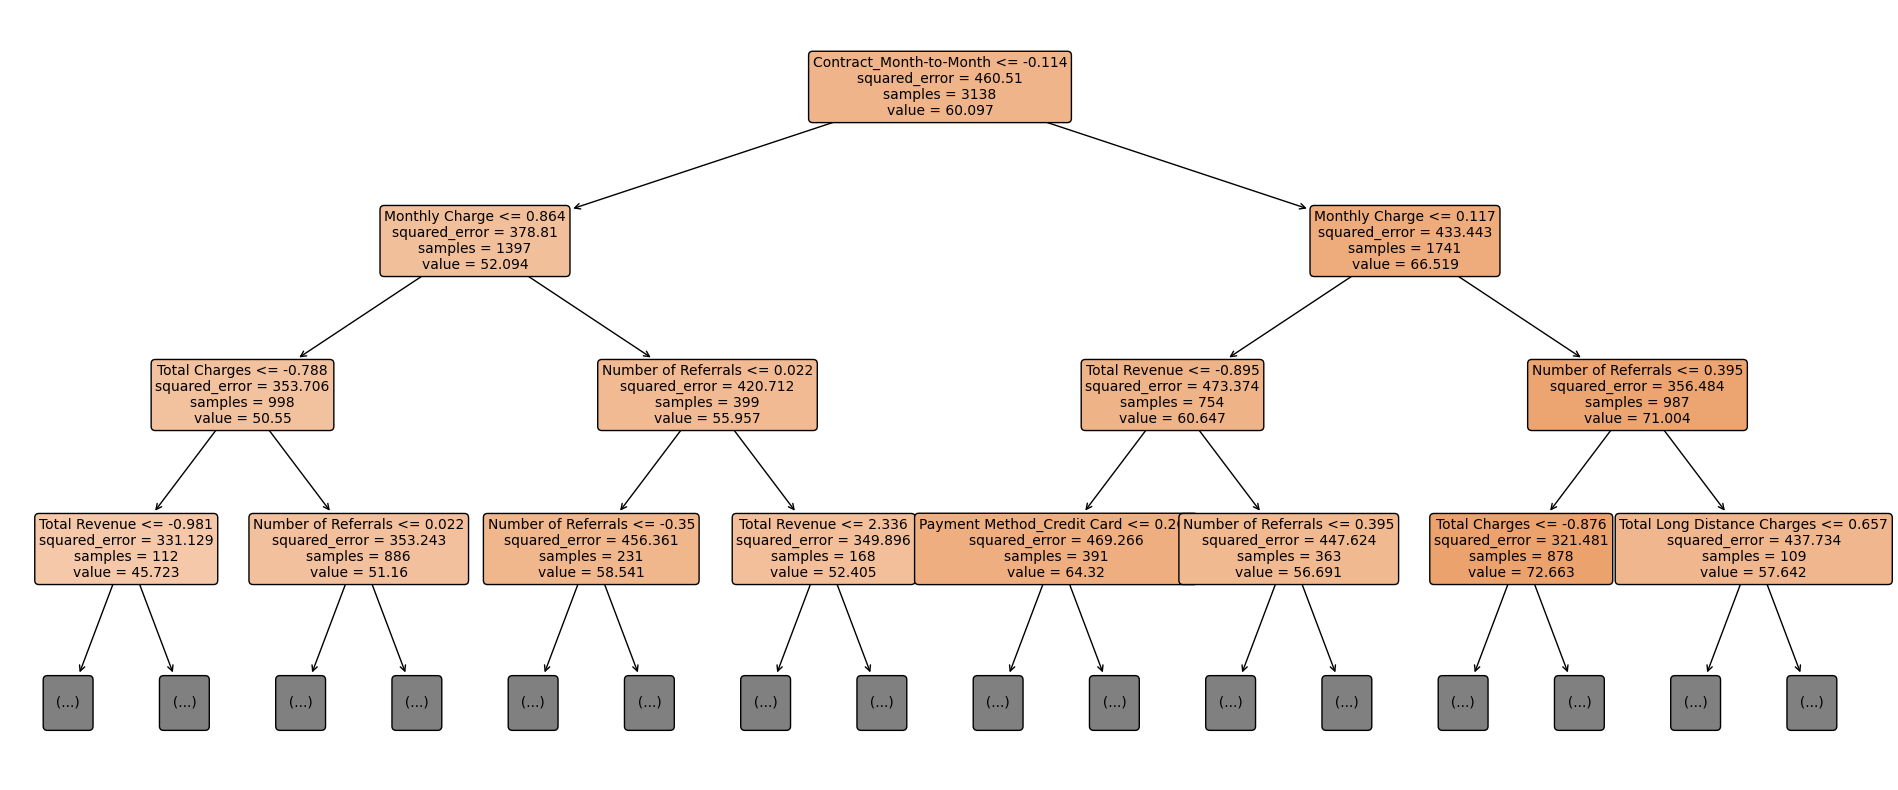

In [54]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(24, 10))
plot_tree(tree, ax=ax, feature_names=X_train.columns, class_names=X_test.columns, filled=True, rounded=True, fontsize=10, max_depth=3)
plt.show()

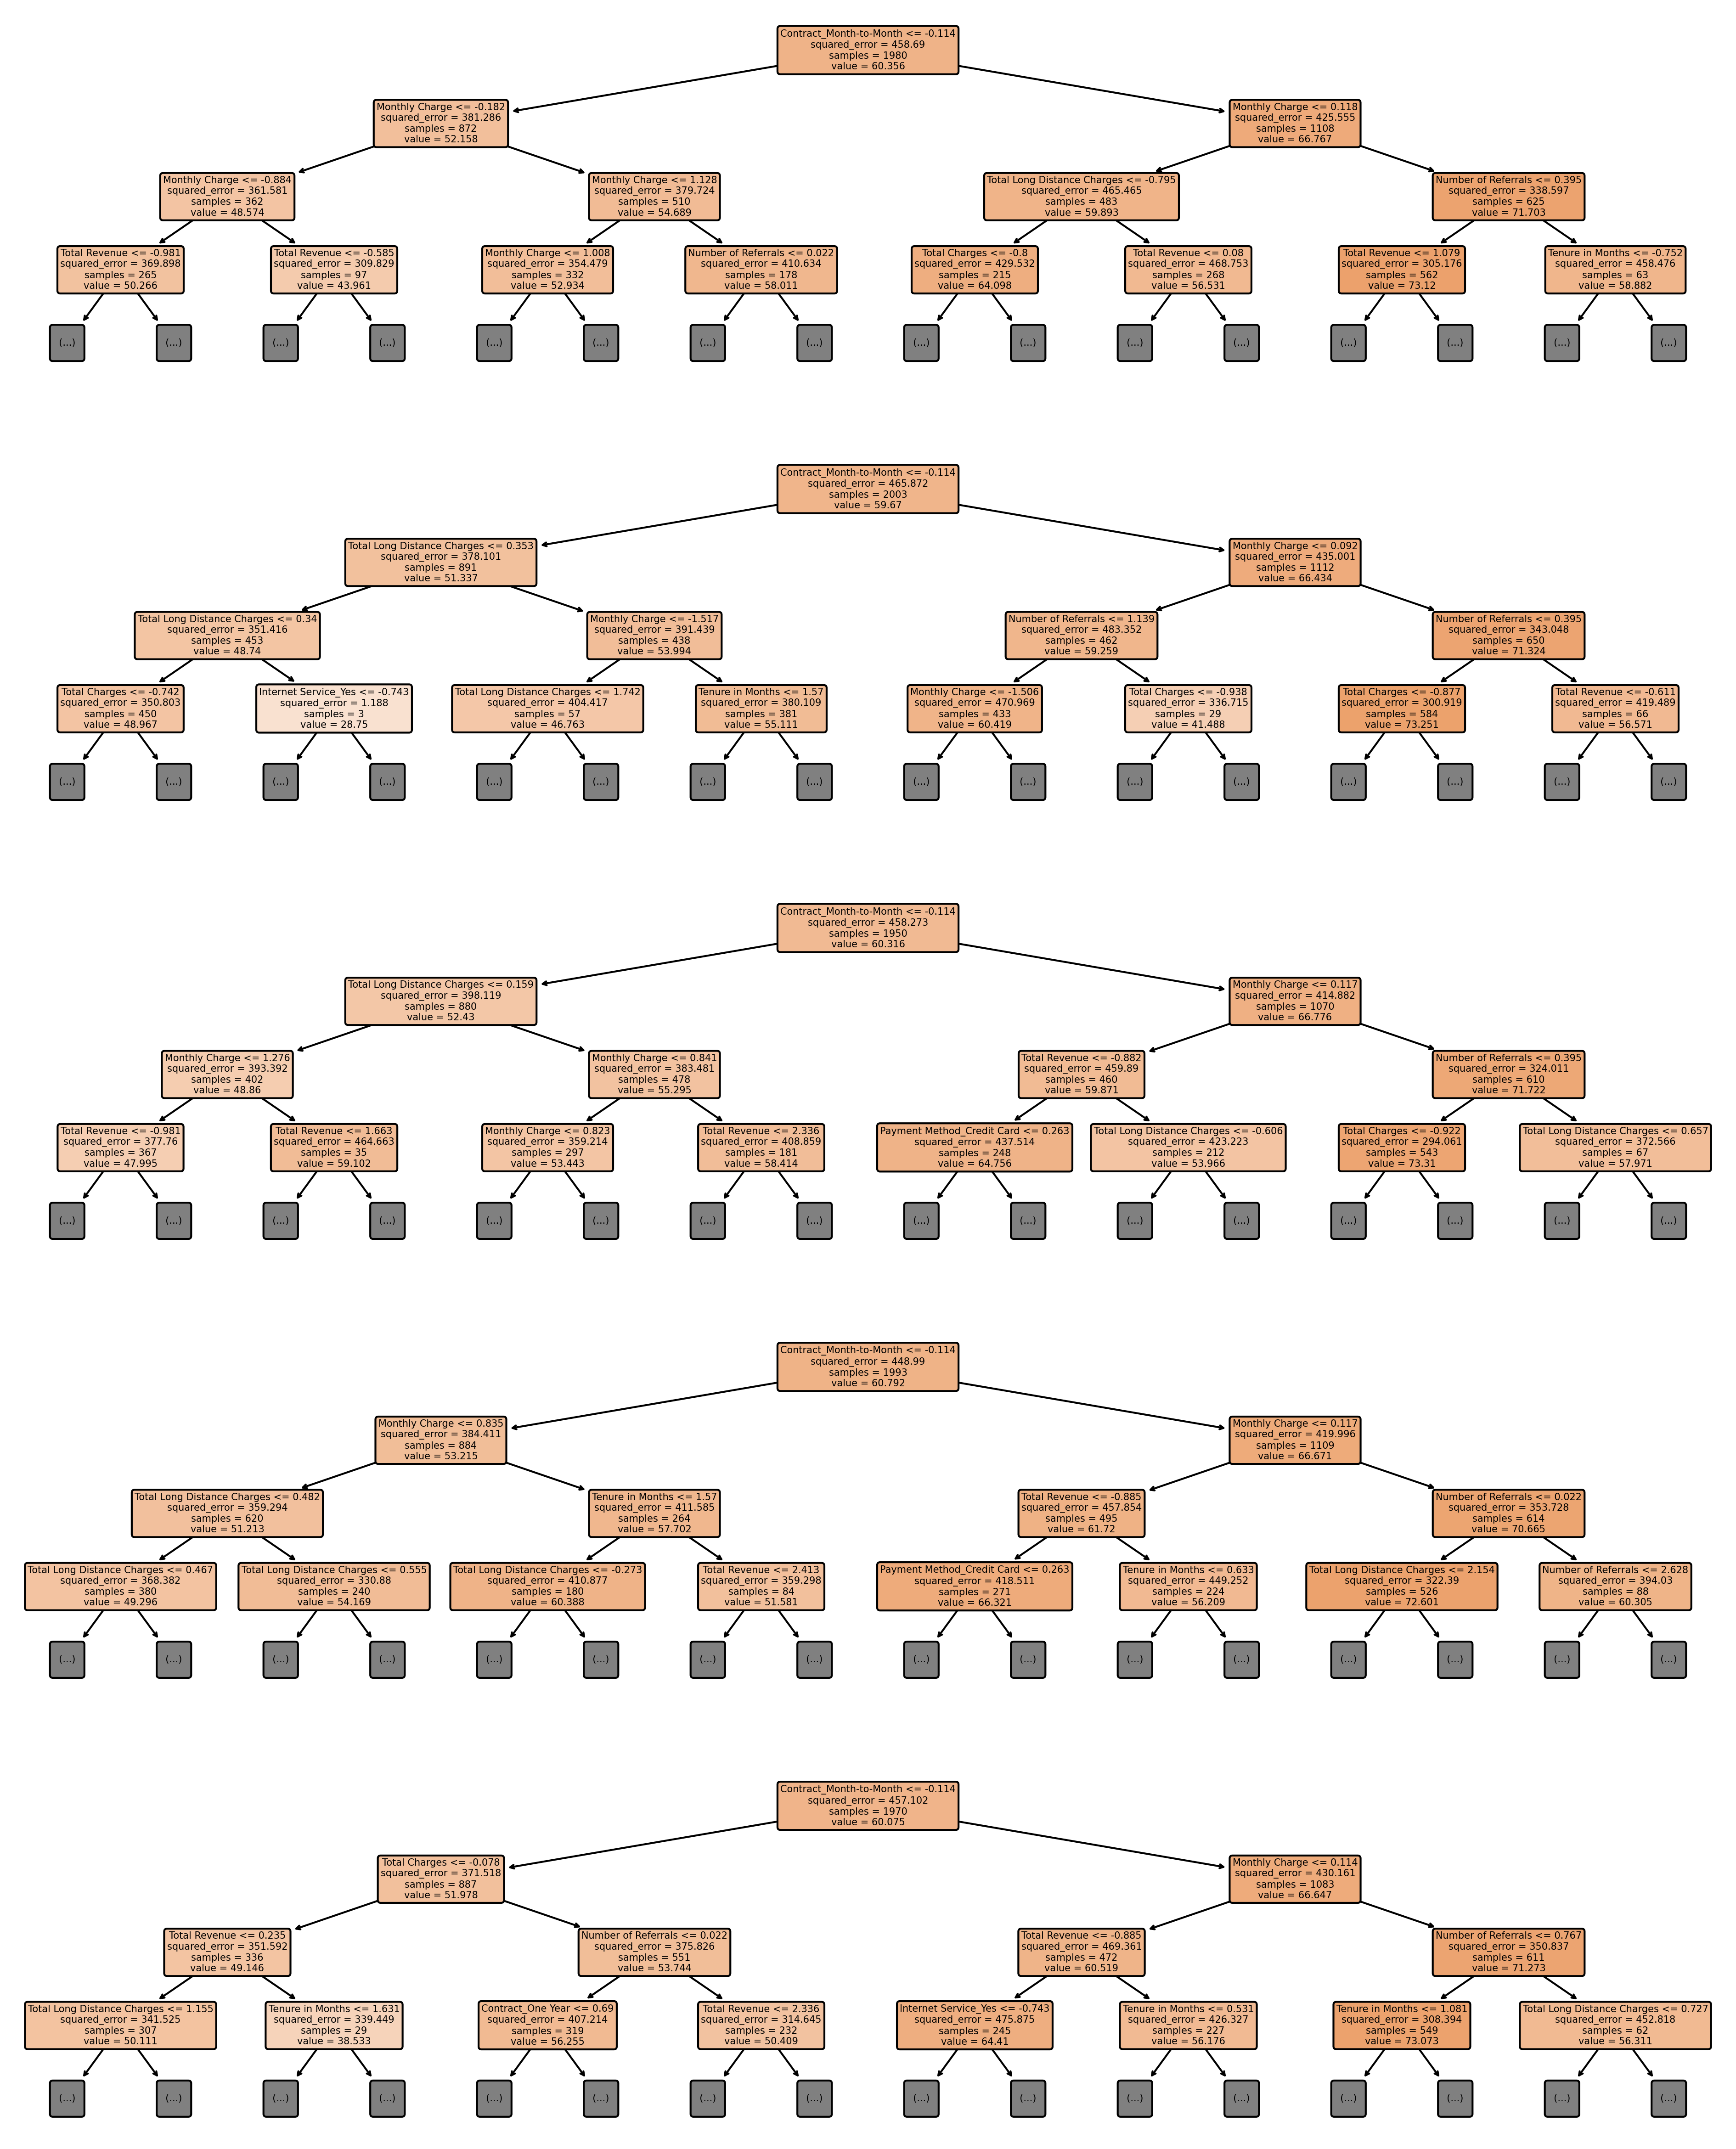

In [55]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(16,20), dpi=300)
for i in range(5):
    tree = rf.estimators_[i]
    axes[i].set_title(f'Tree {i+1}')
    plot_tree(tree, ax=axes[i], feature_names=X_train.columns, class_names=X_test.columns, filled=True, rounded=True, fontsize=5, max_depth=3)

plt.show()

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

print("PCA object details:")
print("Number of components:", pca.n_components)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Singular values:", pca.singular_values_)
print("Components (eigenvectors):")
print(pca.components_)
print("Mean of each feature (before scaling):")
print(pca.mean_)

PCA object details:
Number of components: 2
Explained variance ratio: [0.36791191 0.21694181]
Singular values: [76.43693646 58.69525366]
Components (eigenvectors):
[[-0.33630602  0.43503816  0.24832498  0.18829408  0.10929678  0.03353842
   0.44413312  0.360559    0.15313041  0.22749507  0.43010264  0.00112076]
 [-0.26579239  0.08314782  0.1824978   0.05333629 -0.45161172  0.47687773
  -0.07634882  0.02470842  0.13502897 -0.42703365 -0.10588004 -0.48650213]]
Mean of each feature (before scaling):
[ 0.00919498 -0.03736031 -0.01317149 -0.01337711 -0.01014891  0.02869308
 -0.05236637 -0.04421393  0.00230886 -0.0252432  -0.05008511 -0.02034386]


In [57]:
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Save the DataFrame to an Excel file
excel_file_path = r'C:\Users\User\Desktop\پروژه کاشناسی\فاز دوم پروژه\pca_data.xlsx'
pca_df.to_excel(excel_file_path, index=False)

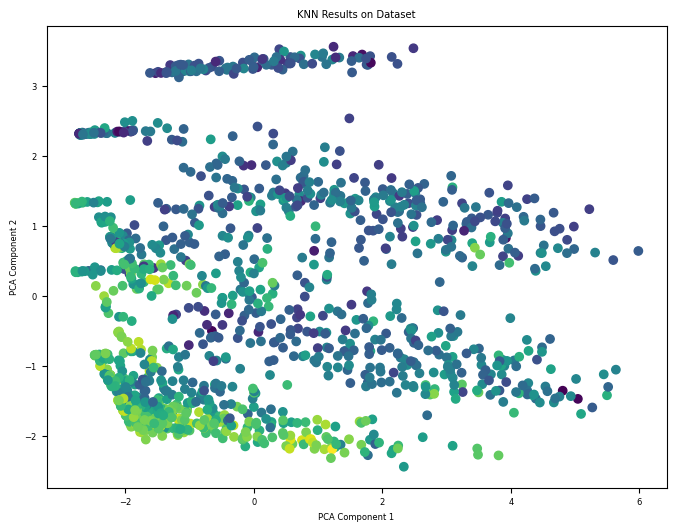

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=knn.predict(X_test), cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KNN Results on Dataset')
plt.show()

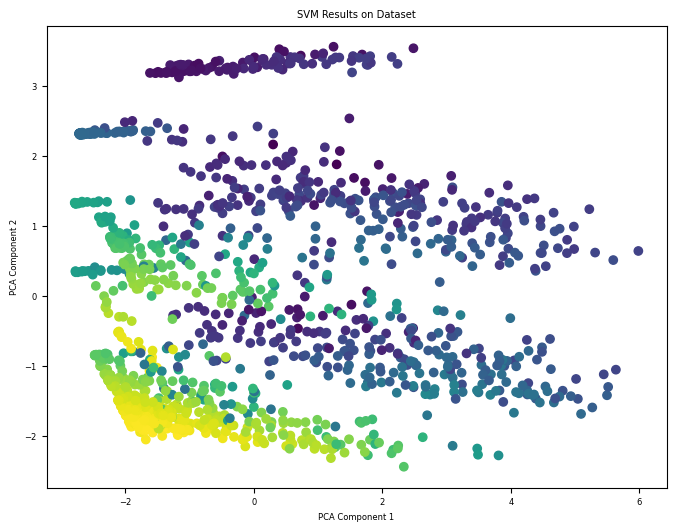

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=svm_reg.predict(X_test), cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Results on Dataset')
plt.show()

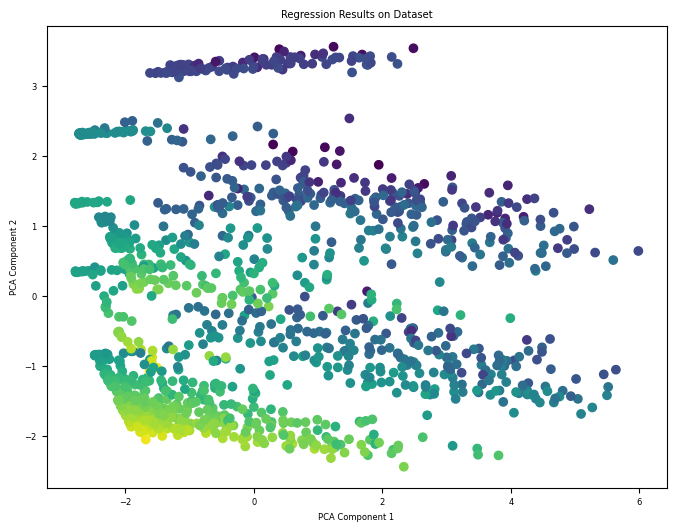

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=reg.predict(X_test), cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Regression Results on Dataset')
plt.show()

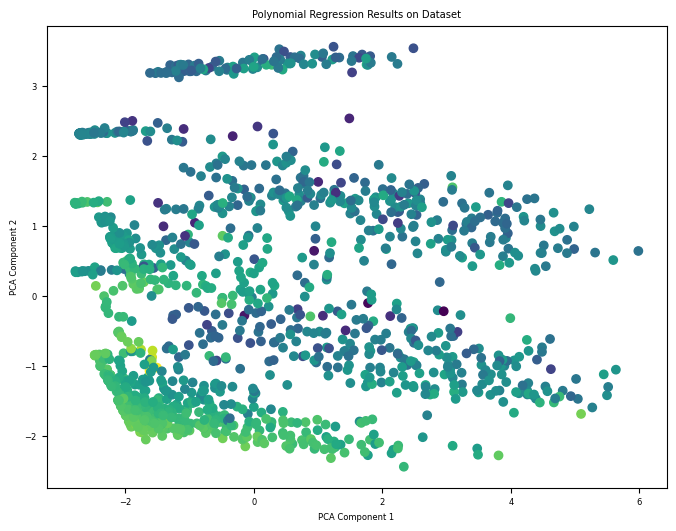

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=poly_regressor.predict(poly.fit_transform(X_test)), cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Polynomial Regression Results on Dataset')
plt.show()

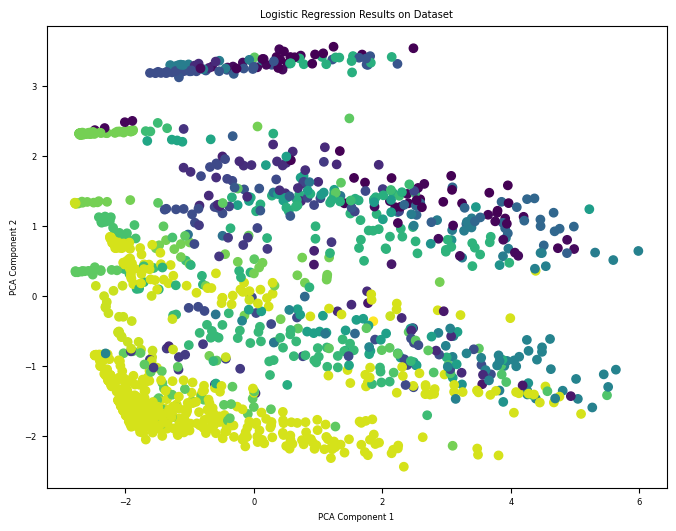

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=logreg.predict(X_test), cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Logistic Regression Results on Dataset')
plt.show()

43/43 [==============================] - 0s 2ms/step


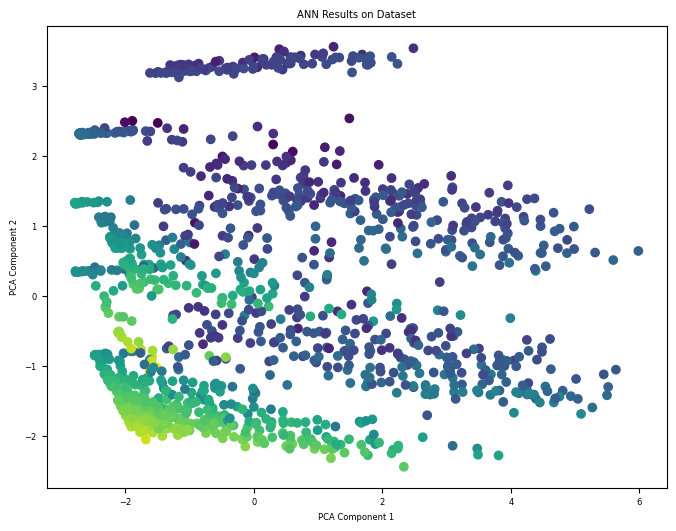

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.array(model.predict(X_test)).flatten().tolist(), cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('ANN Results on Dataset')
plt.show()

In the example code snippet provided above, the breast cancer dataset is used, and the target variable is binary, with values of either 0 or 1. In the scatter() function used for plotting, the c parameter is set to y, which is the target variable vector. This means that the color of each data point in the plot is determined by its corresponding target variable value.

In particular, the cmap parameter in the scatter() function is set to 'viridis', which is a colormap that maps low values to a shade of blue and high values to a shade of yellow. For example, if the target variable value is 0, the corresponding data point will be colored blue, and if the target variable value is 1, the corresponding data point will be colored yellow.

In [64]:
reset_X_test = X_test.reset_index()

In [65]:
reset_X_train = X_train.reset_index()

In [66]:
dict_train_result = {'Old Churn Score':Y_train}
df_train_result = pd.DataFrame(dict_train_result)
reset_df_train_result = df_train_result.reset_index()
df_merged_train = reset_X_train.merge(reset_df_train_result, on='index', how='left')
df_merged_train

index  Contract_Month-to-Month  Tenure in Months  Contract_Two Year  \
0      4332                 0.892130          0.449503          -0.541968   
1      1180                 0.892130         -1.179735          -0.541968   
2      4261                -1.120663          0.816082          -0.541968   
3       616                -1.120663          1.712163           1.844715   
4      3021                 0.892130          0.205118          -0.541968   
...     ...                      ...               ...                ...   
3133   1033                -1.120663          1.182660          -0.541968   
3134   3264                -1.120663         -0.202192          -0.541968   
3135   1653                -1.120663          0.205118          -0.541968   
3136   2607                -1.120663          1.508508           1.844715   
3137   2732                 0.892130         -0.935349          -0.541968   

      Number of Referrals  Internet Service_Yes  Payment Method_Credit Card  \
0               -0.535800              0.502870                    1.297093   
1               -0.535800              0.502870                   -0.770783   
2               -0.535800              0.502870                   -0.770783   
3               -0.535800              0.502870                   -0.770783   
4               -0.535800              0.502870                   -0.770783   
...                   ...                   ...                         ...   
3133            -0.163629              0.502870                   -0.770783   
3134            -0.535800             -1.988142                    1.297093   
3135            -0.535800              0.502870                   -0.770783   
3136             3.185908              0.502870                   -0.770783   
3137            -0.535800              0.502870                   -0.770783   

      Total Revenue  Total Long Distance Charges  Contract_One Year  \
0          0.226440                    -0.452692          -0.525064   
1         -0.963645                    -0.790601          -0.525064   
2          1.235799                     0.562334           1.904103   
3          2.395592                     1.490267          -0.525064   
4         -0.016983                     0.029336          -0.525064   
...             ...                          ...                ...   
3133       1.723268                     0.774124           1.904103   
3134      -0.806218                    -0.798307           1.904103   
3135       0.370572                     0.235840           1.904103   
3136       0.229947                    -0.839247          -0.525064   
3137      -0.794691                    -0.811095          -0.525064   

      Monthly Charge  Total Charges  Payment Method_Bank Withdrawal  \
0           0.523605       0.453828                       -1.145826   
1           0.189825      -0.930149                        0.872538   
2           1.283415       1.359227                        0.872538   
3           1.422630       2.487398                        0.872538   
4          -0.204337      -0.032337                        0.872538   
...              ...            ...                             ...   
3133        1.491399       1.899076                        0.872538   
3134       -1.536103      -0.727763                       -1.145826   
3135        0.652756       0.382816                        0.872538   
3136       -0.494508       0.600708                        0.872538   
3137        0.429677      -0.708441                        0.872538   

      Old Churn Score  
0                  62  
1                  77  
2                  42  
3                  71  
4                  27  
...               ...  
3133               90  
3134               56  
3135               81  
3136               77  
3137               47  

[3138 rows x 14 columns]

In [67]:
dict_test_result = {'New Churn Score':Churn_Value_hat_8}
df_test_result = pd.DataFrame(dict_test_result)
df_merged_test = pd.concat([reset_X_test,df_test_result], axis = 1)
df_merged_test

index  Contract_Month-to-Month  Tenure in Months  Contract_Two Year  \
0       220                 0.892130          0.490234          -0.541968   
1       980                 0.892130         -0.731694          -0.541968   
2      1114                 0.892130         -1.139004          -0.541968   
3      2306                -1.120663          1.467777          -0.541968   
4       218                 0.892130         -1.098273          -0.541968   
...     ...                      ...               ...                ...   
1340    316                 0.892130          0.938275          -0.541968   
1341    132                 0.892130         -1.179735          -0.541968   
1342   3810                -1.120663          0.979006          -0.541968   
1343   1829                 0.892130         -1.057542          -0.541968   
1344    299                 0.892130         -1.179735          -0.541968   

      Number of Referrals  Internet Service_Yes  Payment Method_Credit Card  \
0               -0.163629               0.50287                    1.297093   
1               -0.535800               0.50287                   -0.770783   
2               -0.535800               0.50287                   -0.770783   
3                3.185908               0.50287                   -0.770783   
4               -0.535800               0.50287                   -0.770783   
...                   ...                   ...                         ...   
1340            -0.163629               0.50287                   -0.770783   
1341            -0.163629               0.50287                   -0.770783   
1342            -0.535800               0.50287                    1.297093   
1343            -0.535800               0.50287                   -0.770783   
1344            -0.535800               0.50287                   -0.770783   

      Total Revenue  Total Long Distance Charges  Contract_One Year  \
0          0.170266                    -0.692587          -0.525064   
1         -0.463715                    -0.334678          -0.525064   
2         -0.934102                    -0.824316          -0.525064   
3          1.925495                     2.131382           1.904103   
4         -0.908308                    -0.828482          -0.525064   
...             ...                          ...                ...   
1340       1.647535                     1.672617          -0.525064   
1341      -0.965465                    -0.794334          -0.525064   
1342       1.500049                     1.389050           1.904103   
1343      -0.858047                    -0.706458          -0.525064   
1344      -0.967485                    -0.801763          -0.525064   

      Monthly Charge  Total Charges  Payment Method_Bank Withdrawal  \
0           0.283753       0.471020                       -1.145826   
1           1.114009      -0.464460                        0.872538   
2           0.719847      -0.880279                        0.872538   
3           0.781907       1.655295                        0.872538   
4           0.476641      -0.846049                        0.872538   
...              ...            ...                             ...   
1340        1.280061       1.472011                        0.872538   
1341        0.119379      -0.931080                        0.872538   
1342        1.152587       1.389552                       -1.145826   
1343        0.446450      -0.827303                        0.872538   
1344        0.132797      -0.930903                        0.872538   

      New Churn Score  
0           58.893669  
1           76.405418  
2           76.204948  
3           51.015415  
4           74.688744  
...               ...  
1340        68.262367  
1341        71.611839  
1342        56.675922  
1343        74.263191  
1344        73.157143  

[1345 rows x 14 columns]

In [68]:
churn_score = 60
df_test_loyal_customers = df_merged_test[df_merged_test['New Churn Score'] <= churn_score]
df_test_churn_customers = df_merged_test[df_merged_test['New Churn Score'] > churn_score]
df_train_loyal_customers = df_merged_train[df_merged_train['Old Churn Score'] <= churn_score]
df_train_churn_customers = df_merged_train[df_merged_train['Old Churn Score'] > churn_score]

In [69]:
df_test_churn_customers

index  Contract_Month-to-Month  Tenure in Months  Contract_Two Year  \
1       980                  0.89213         -0.731694          -0.541968   
2      1114                  0.89213         -1.139004          -0.541968   
4       218                  0.89213         -1.098273          -0.541968   
11     1869                  0.89213         -0.935349          -0.541968   
13     2174                  0.89213          1.345584          -0.541968   
...     ...                      ...               ...                ...   
1339   3240                  0.89213         -0.609501          -0.541968   
1340    316                  0.89213          0.938275          -0.541968   
1341    132                  0.89213         -1.179735          -0.541968   
1343   1829                  0.89213         -1.057542          -0.541968   
1344    299                  0.89213         -1.179735          -0.541968   

      Number of Referrals  Internet Service_Yes  Payment Method_Credit Card  \
1               -0.535800               0.50287                   -0.770783   
2               -0.535800               0.50287                   -0.770783   
4               -0.535800               0.50287                   -0.770783   
11              -0.535800               0.50287                    1.297093   
13              -0.163629               0.50287                   -0.770783   
...                   ...                   ...                         ...   
1339            -0.535800               0.50287                   -0.770783   
1340            -0.163629               0.50287                   -0.770783   
1341            -0.163629               0.50287                   -0.770783   
1343            -0.535800               0.50287                   -0.770783   
1344            -0.535800               0.50287                   -0.770783   

      Total Revenue  Total Long Distance Charges  Contract_One Year  \
1         -0.463715                    -0.334678          -0.525064   
2         -0.934102                    -0.824316          -0.525064   
4         -0.908308                    -0.828482          -0.525064   
11        -0.787754                    -0.642436          -0.525064   
13         1.223968                     0.765166          -0.525064   
...             ...                          ...                ...   
1339      -0.504875                    -0.677234          -0.525064   
1340       1.647535                     1.672617          -0.525064   
1341      -0.965465                    -0.794334          -0.525064   
1343      -0.858047                    -0.706458          -0.525064   
1344      -0.967485                    -0.801763          -0.525064   

      Monthly Charge  Total Charges  Payment Method_Bank Withdrawal  \
1           1.114009      -0.464460                        0.872538   
2           0.719847      -0.880279                        0.872538   
4           0.476641      -0.846049                        0.872538   
11          0.169697      -0.761794                       -1.145826   
13          0.531991       1.269492                        0.872538   
...              ...            ...                             ...   
1339        0.629274      -0.390410                       -1.145826   
1340        1.280061       1.472011                        0.872538   
1341        0.119379      -0.931080                        0.872538   
1343        0.446450      -0.827303                        0.872538   
1344        0.132797      -0.930903                        0.872538   

      New Churn Score  
1           76.405418  
2           76.204948  
4           74.688744  
11          66.351105  
13          61.613155  
...               ...  
1339        76.329697  
1340        68.262367  
1341        71.611839  
1343        74.263191  
1344        73.157143  

[599 rows x 14 columns]

In [70]:
df_customers_services = df_services.reset_index()
df_customers_services

index Customer ID  Count Quarter Referred a Friend  Number of Referrals  \
0         0  8779-QRDMV      1      Q3                No                    0   
1         1  7495-OOKFY      1      Q3               Yes                    1   
2         2  1658-BYGOY      1      Q3                No                    0   
3         3  4598-XLKNJ      1      Q3               Yes                    1   
4         4  4846-WHAFZ      1      Q3               Yes                    1   
...     ...         ...    ...     ...               ...                  ...   
7038   7038  2569-WGERO      1      Q3                No                    0   
7039   7039  6840-RESVB      1      Q3               Yes                    1   
7040   7040  2234-XADUH      1      Q3               Yes                    4   
7041   7041  4801-JZAZL      1      Q3               Yes                    1   
7042   7042  3186-AJIEK      1      Q3                No                    0   

      Tenure in Months    Offer Phone Service  \
0                    1     None            No   
1                    8  Offer E           Yes   
2                   18  Offer D           Yes   
3                   25  Offer C           Yes   
4                   37  Offer C           Yes   
...                ...      ...           ...   
7038                72     None           Yes   
7039                24  Offer C           Yes   
7040                72     None           Yes   
7041                11     None            No   
7042                66     None           Yes   

      Avg Monthly Long Distance Charges Multiple Lines Internet Service  \
0                                  0.00             No              Yes   
1                                 48.85            Yes              Yes   
2                                 11.33            Yes              Yes   
3                                 19.76             No              Yes   
4                                  6.33            Yes              Yes   
...                                 ...            ...              ...   
7038                              22.77             No               No   
7039                              36.05            Yes              Yes   
7040                              29.66            Yes              Yes   
7041                               0.00             No              Yes   
7042                              30.96             No              Yes   

     Internet Type  Avg Monthly GB Download Online Security Online Backup  \
0              DSL                        8              No            No   
1      Fiber Optic                       17              No           Yes   
2      Fiber Optic                       52              No            No   
3      Fiber Optic                       12              No           Yes   
4      Fiber Optic                       14              No            No   
...            ...                      ...             ...           ...   
7038          None                        0              No            No   
7039         Cable                       24             Yes            No   
7040   Fiber Optic                       59              No           Yes   
7041           DSL                       17             Yes            No   
7042   Fiber Optic                       11             Yes            No   

     Device Protection Plan Premium Tech Support Streaming TV  \
0                       Yes                   No           No   
1                        No                   No           No   
2                        No                   No          Yes   
3                       Yes                   No          Yes   
4                        No                   No           No   
...                     ...                  ...          ...   
7038                     No                   No           No   
7039                    Yes                  Yes          Yes   
7040                    Yes      

In [71]:
df_test_loyal_Feature_Service = df_test_loyal_customers.merge(df_customers_services, on='index', how='left')
df_train_loyal_Feature_Service = df_train_loyal_customers.merge(df_customers_services, on='index', how='left')

In [72]:
df_train_loyal_Feature_Service = df_train_loyal_Feature_Service.drop(columns=['Count','Quarter','Referred a Friend',
                                                                              'Number of Referrals_y','Tenure in Months_y','Offer',
                                                                              'Avg Monthly Long Distance Charges','Avg Monthly GB Download',
                                                                              'Monthly Charge_y','Total Charges_y','Total Refunds',
                                                                              'Total Extra Data Charges','Total Long Distance Charges_y',
                                                                              'Total Revenue_y'])

List_Services = ['Phone Service','Multiple Lines','Internet Service','Internet Type','Online Security','Online Backup','Device Protection Plan',
                                                           	'Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data','Contract','Paperless Billing','Payment Method']
for categorical_column in List_Services :
    one_hot = pd.get_dummies(df_train_loyal_Feature_Service[categorical_column],prefix=categorical_column)
    df_train_loyal_Feature_Service = df_train_loyal_Feature_Service.drop(categorical_column,axis = 1)
    df_train_loyal_Feature_Service = pd.concat([df_train_loyal_Feature_Service,one_hot],axis=1)

df_train_loyal_Feature_Service = df_train_loyal_Feature_Service.drop(columns=['Phone Service_No','Multiple Lines_No','Internet Service_No',
                                                                              'Internet Type_None','Online Security_No','Online Backup_No',
                                                                              'Device Protection Plan_No','Premium Tech Support_No','Streaming TV_No',
                                                                              'Streaming Movies_No','Streaming Music_No','Unlimited Data_No',
                                                                              'Paperless Billing_No'])

new_column_names = ['index', 'Contract_Month-to-Month', 'Tenure in Months_x',
       'Contract_Two Year', 'Number of Referrals_x', 'Internet Service_Yes',
       'Payment Method_Credit Card', 'Total Revenue_x',
       'Total Long Distance Charges_x', 'Contract_One Year',
       'Monthly Charge_x', 'Total Charges_x', 'Payment Method_Bank Withdrawal',
       'Old Churn Score', 'Customer ID', 'Phone Service',
       'Multiple Lines Service', 'Internet Service', 'Internet Type_Cable Service',
       'Internet Type_DSL Service', 'Internet Type_Fiber Optic Service', 'Online Security Service',
       'Online Backup Service', 'Device Protection Plan Service',
       'Premium Tech Support Service', 'Streaming TV Service', 'Streaming Movies Service',
       'Streaming Music Service', 'Unlimited Data Service', 'Contract_Month-to-Month Service',
       'Contract_One Year Service', 'Contract_Two Year Service', 'Paperless Billing Service',
       'Payment Method_Bank Withdrawal Service', 'Payment Method_Credit Card Service',
       'Payment Method_Mailed Check Service']

df_train_loyal_Feature_Service.columns = new_column_names 
df_train_loyal_Feature_Service

index  Contract_Month-to-Month  Tenure in Months_x  Contract_Two Year  \
0      4261                -1.120663            0.816082          -0.541968   
1      3021                 0.892130            0.205118          -0.541968   
2      2810                 0.892130            0.653158          -0.541968   
3      3367                -1.120663            0.775351           1.844715   
4      3473                -1.120663            1.630701           1.844715   
...     ...                      ...                 ...                ...   
1413    705                 0.892130           -1.139004          -0.541968   
1414   3468                 0.892130           -0.853887          -0.541968   
1415   4373                -1.120663            1.589970          -0.541968   
1416   3264                -1.120663           -0.202192          -0.541968   
1417   2732                 0.892130           -0.935349          -0.541968   

      Number of Referrals_x  Internet Service_Yes  Payment Method_Credit Card  \
0                 -0.535800              0.502870                   -0.770783   
1                 -0.535800              0.502870                   -0.770783   
2                 -0.535800              0.502870                   -0.770783   
3                 -0.535800              0.502870                   -0.770783   
4                 -0.163629              0.502870                    1.297093   
...                     ...                   ...                         ...   
1413              -0.535800              0.502870                   -0.770783   
1414              -0.535800              0.502870                   -0.770783   
1415               2.069395              0.502870                    1.297093   
1416              -0.535800             -1.988142                    1.297093   
1417              -0.535800              0.502870                   -0.770783   

      Total Revenue_x  Total Long Distance Charges_x  Contract_One Year  \
0            1.235799                       0.562334           1.904103   
1           -0.016983                       0.029336          -0.525064   
2            0.405635                       1.394035          -0.525064   
3            0.428832                      -0.396148          -0.525064   
4            1.899355                       2.477466          -0.525064   
...               ...                            ...                ...   
1413        -0.938117                      -0.802666          -0.525064   
1414        -0.699024                      -0.489105          -0.525064   
1415         0.671379                       0.338876           1.904103   
1416        -0.806218                      -0.798307           1.904103   
1417        -0.794691                      -0.811095          -0.525064   

      Monthly Charge_x  Total Charges_x  Payment Method_Bank Withdrawal  \
0             1.283415         1.359227                        0.872538   
1            -0.204337        -0.032337                        0.872538   
2            -0.695782         0.000496                        0.872538   
3             0.293817         0.689534                        0.872538   
4             0.451481         1.494638                       -1.145826   
...                ...              ...                             ...   
1413          0.231757        -0.893345                       -1.145826   
1414          0.085833        -0.705823                        0.872538   
1415         -0.403934         0.726137                       -1.145826   
1416         -1.536103        -0.727763                       -1.145826   
1417          0.429677        -0.708441                        0.872538   

      Old Churn Score Customer ID  Phone Service  Multiple Lines Service  \
0                  42  5445-GLVOT              1                       0   
1                  27  0139-IVFJG              1                       0   
2                  44  6152-ONASV              1      

In [73]:
df_test_loyal_Feature_Service = df_test_loyal_Feature_Service.drop(columns=['Count','Quarter','Referred a Friend',
                                                                              'Number of Referrals_y','Tenure in Months_y','Offer',
                                                                              'Avg Monthly Long Distance Charges','Avg Monthly GB Download',
                                                                              'Monthly Charge_y','Total Charges_y','Total Refunds',
                                                                              'Total Extra Data Charges','Total Long Distance Charges_y',
                                                                              'Total Revenue_y'])

List_Services = ['Phone Service','Multiple Lines','Internet Service','Internet Type','Online Security','Online Backup','Device Protection Plan',
                                                           	'Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data','Contract','Paperless Billing','Payment Method']
for categorical_column in List_Services :
    one_hot = pd.get_dummies(df_test_loyal_Feature_Service[categorical_column],prefix=categorical_column)
    df_test_loyal_Feature_Service = df_test_loyal_Feature_Service.drop(categorical_column,axis = 1)
    df_test_loyal_Feature_Service = pd.concat([df_test_loyal_Feature_Service,one_hot],axis=1)

df_test_loyal_Feature_Service = df_test_loyal_Feature_Service.drop(columns=['Phone Service_No','Multiple Lines_No','Internet Service_No',
                                                                              'Internet Type_None','Online Security_No','Online Backup_No',
                                                                              'Device Protection Plan_No','Premium Tech Support_No','Streaming TV_No',
                                                                              'Streaming Movies_No','Streaming Music_No','Unlimited Data_No',
                                                                              'Paperless Billing_No'])

new_column_names = ['index', 'Contract_Month-to-Month', 'Tenure in Months_x',
       'Contract_Two Year', 'Number of Referrals_x', 'Internet Service_Yes',
       'Payment Method_Credit Card', 'Total Revenue_x',
       'Total Long Distance Charges_x', 'Contract_One Year',
       'Monthly Charge_x', 'Total Charges_x', 'Payment Method_Bank Withdrawal',
       'Old Churn Score', 'Customer ID', 'Phone Service',
       'Multiple Lines Service', 'Internet Service', 'Internet Type_Cable Service',
       'Internet Type_DSL Service', 'Internet Type_Fiber Optic Service', 'Online Security Service',
       'Online Backup Service', 'Device Protection Plan Service',
       'Premium Tech Support Service', 'Streaming TV Service', 'Streaming Movies Service',
       'Streaming Music Service', 'Unlimited Data Service', 'Contract_Month-to-Month Service',
       'Contract_One Year Service', 'Contract_Two Year Service', 'Paperless Billing Service',
       'Payment Method_Bank Withdrawal Service', 'Payment Method_Credit Card Service',
       'Payment Method_Mailed Check Service']

df_test_loyal_Feature_Service.columns = new_column_names 
df_test_loyal_Feature_Service

index  Contract_Month-to-Month  Tenure in Months_x  Contract_Two Year  \
0      220                 0.892130            0.490234          -0.541968   
1     2306                -1.120663            1.467777          -0.541968   
2     1499                 0.892130           -1.179735          -0.541968   
3     2401                -1.120663           -0.039268          -0.541968   
4     4447                -1.120663            1.304853          -0.541968   
..     ...                      ...                 ...                ...   
741   3845                 0.892130           -0.690963          -0.541968   
742   4363                 0.892130           -0.650232          -0.541968   
743   2519                -1.120663            0.205118           1.844715   
744   1504                -1.120663            1.345584          -0.541968   
745   3810                -1.120663            0.979006          -0.541968   

     Number of Referrals_x  Internet Service_Yes  Payment Method_Credit Card  \
0                -0.163629              0.502870                    1.297093   
1                 3.185908              0.502870                   -0.770783   
2                -0.535800             -1.988142                    1.297093   
3                -0.535800              0.502870                   -0.770783   
4                 1.325054              0.502870                   -0.770783   
..                     ...                   ...                         ...   
741              -0.535800             -1.988142                   -0.770783   
742               0.580713              0.502870                    1.297093   
743              -0.535800             -1.988142                   -0.770783   
744              -0.535800              0.502870                   -0.770783   
745              -0.535800              0.502870                    1.297093   

     Total Revenue_x  Total Long Distance Charges_x  Contract_One Year  \
0           0.170266                      -0.692587          -0.525064   
1           1.925495                       2.131382           1.904103   
2          -0.979767                      -0.784472          -0.525064   
3          -0.627317                      -0.839247           1.904103   
4           2.287733                       2.516479           1.904103   
..               ...                            ...                ...   
741        -0.701170                      -0.104790          -0.525064   
742        -0.551409                      -0.466022          -0.525064   
743        -0.643873                      -0.564470          -0.525064   
744         1.330182                      -0.203551           1.904103   
745         1.500049                       1.389050           1.904103   

     Monthly Charge_x  Total Charges_x  Payment Method_Bank Withdrawal  \
0            0.283753         0.471020                       -1.145826   
1            0.781907         1.655295                        0.872538   
2           -1.526039        -0.952843                       -1.145826   
3           -1.009435        -0.485912                       -1.145826   
4            1.295156         1.972550                        0.872538   
..                ...              ...                             ...   
741         -1.519330        -0.850153                        0.872538   
742          0.030483        -0.527219                       -1.145826   
743         -1.422047        -0.608147                        0.872538   
744          1.147555         1.761069                        0.872538   
745          1.152587         1.389552                       -1.145826   

     Old Churn Score Customer ID  Phone Service  Multiple Lines Service  \
0          58.893669  5178-LMXOP              1                       1   
1          51.015415  4905-JEFDW              0                       0   
2          56.516258  9172-ANCRX              1                       1   
3          48.750248  3058-HJ

In [74]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
import random

result_recommendation_new_records = pd.DataFrame(columns=[col for col in df_test_loyal_Feature_Service.iloc[:,15:].columns])
K_most_similar_records = 10
num_numbers = K_most_similar_records

# Generate a list of random numbers
random_numbers = [random.random() for _ in range(num_numbers)]

# Normalize the list of random numbers
total = sum(random_numbers)
normalized_numbers = [num / total for num in random_numbers]

# Sort the normalized numbers in descending order
normalized_numbers.sort(reverse=True)

# Load your existing records and new record DataFrames
existing_records_df = df_train_loyal_Feature_Service.iloc[:,1:13]
new_record_df = df_test_loyal_Feature_Service.iloc[:,1:13]

# Combine the existing records and new record for creating a single graph
combined_records_df = pd.concat([existing_records_df, new_record_df], ignore_index=True)

# Create a graph using DeepWalk
graph = {}  # A dictionary to store the graph

# Populate the graph using your combined records DataFrame
for i, record in combined_records_df.iterrows():
    record_id = str(i)  # Convert index to string
    neighbors = [str(n) for n in np.random.choice(len(combined_records_df), size=random.randint(10, 15), replace=False)]
    graph[record_id] = neighbors

    
# Generate random walks on the graph
sentences = []  # List of random walks
num_walks = 18
walk_length = 20

for _ in range(num_walks):
    for node in graph:
        walk = [node]
        while len(walk) < walk_length:
            neighbors = graph[node]
            if not neighbors:
                break
            next_node = random.choice(neighbors)
            walk.append(next_node)
            node = next_node
        sentences.append(walk)

# Train Word2Vec model
embedding_dim = 32
model = Word2Vec(sentences, vector_size=embedding_dim, window=5, sg=1, epochs=5)

for index_record in range(len(existing_records_df),len(combined_records_df)):
    # Calculate embedding for the new record
    new_record_embedding = model.wv[str(index_record)]  # Use the appropriate index

    # Calculate embeddings for the existing records
    existing_record_embeddings = [model.wv[str(node)] for node in range(len(existing_records_df))]

    # Calculate cosine similarities between the new record embedding and existing record embeddings
    similarities = cosine_similarity(new_record_embedding.reshape(1, -1), np.array(existing_record_embeddings))
    
    similar_records_indices = similarities.argsort()[0][-(K_most_similar_records+1):-1]

    # Extract the IDs of the most similar records
    most_similar_ids = df_train_loyal_Feature_Service.iloc[similar_records_indices]['Customer ID']

    # Recommend services based on the most similar records
    similar_records = df_train_loyal_Feature_Service[df_train_loyal_Feature_Service['Customer ID'].isin(most_similar_ids)]
    recommended_services = df_train_loyal_Feature_Service[df_train_loyal_Feature_Service['Customer ID'].isin(most_similar_ids)].iloc[:, 15:]

    new_record_values = []
    for column in recommended_services.columns:
        if sum(normalized_numbers*recommended_services[column]) >= 0.6:
            new_record_values.append(1)
        else:
            new_record_values.append(0)

    result_recommendation_new_records.loc[index_record] = new_record_values

accuracy_list = []
for record_number in range(len(result_recommendation_new_records)):
    count_same = 0
    for column_number in range(len(result_recommendation_new_records.columns)):
        if df_test_loyal_Feature_Service.iloc[record_number,15+column_number] == result_recommendation_new_records.iloc[record_number,column_number] :
            count_same += 1
    accuracy_list.append(count_same / len(result_recommendation_new_records.columns))
Deepwalk_recommender_system_accuracy = np.mean(accuracy_list)
print("DeepWalk Recommender System Accuracy:", Deepwalk_recommender_system_accuracy)

DeepWalk Recommender System Accuracy: 0.6514106983275884


In [76]:
embeddings = {}
for node in graph:
    embeddings[node] = model.wv[node]
df_embedding = pd.DataFrame(embeddings)
df_embedding.to_csv(r"C:\Users\User\Desktop\پروژه کاشناسی\فاز نهایی پروژه\embedding.csv")

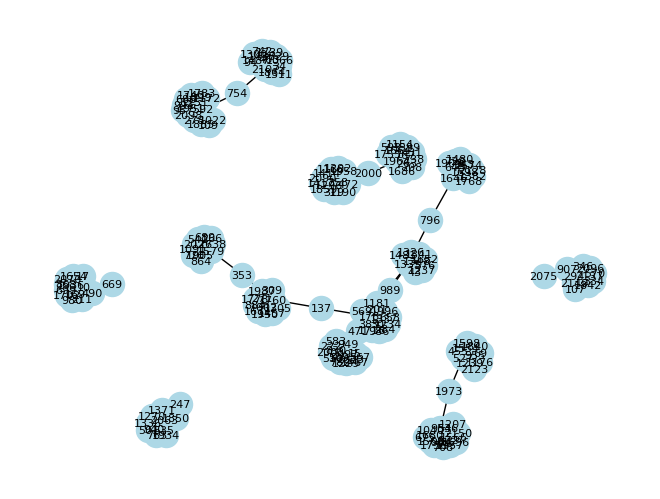

In [ ]:
selected_nodes = np.random.choice(list(graph.keys()), size=15, replace=False)
subgraph = {node: graph[node] for node in selected_nodes}

nx_graph = nx.Graph(subgraph)

edges = [(source, target) for source, targets in subgraph.items() for target in targets]

# Draw the graph using NetworkX
pos = nx.spring_layout(nx_graph, seed=42)  # You can choose a layout algorithm
nx.draw(nx_graph, pos, with_labels=True, node_size=300, font_size=8, node_color='lightblue', edgelist=edges)

# Show the plot
plt.show()

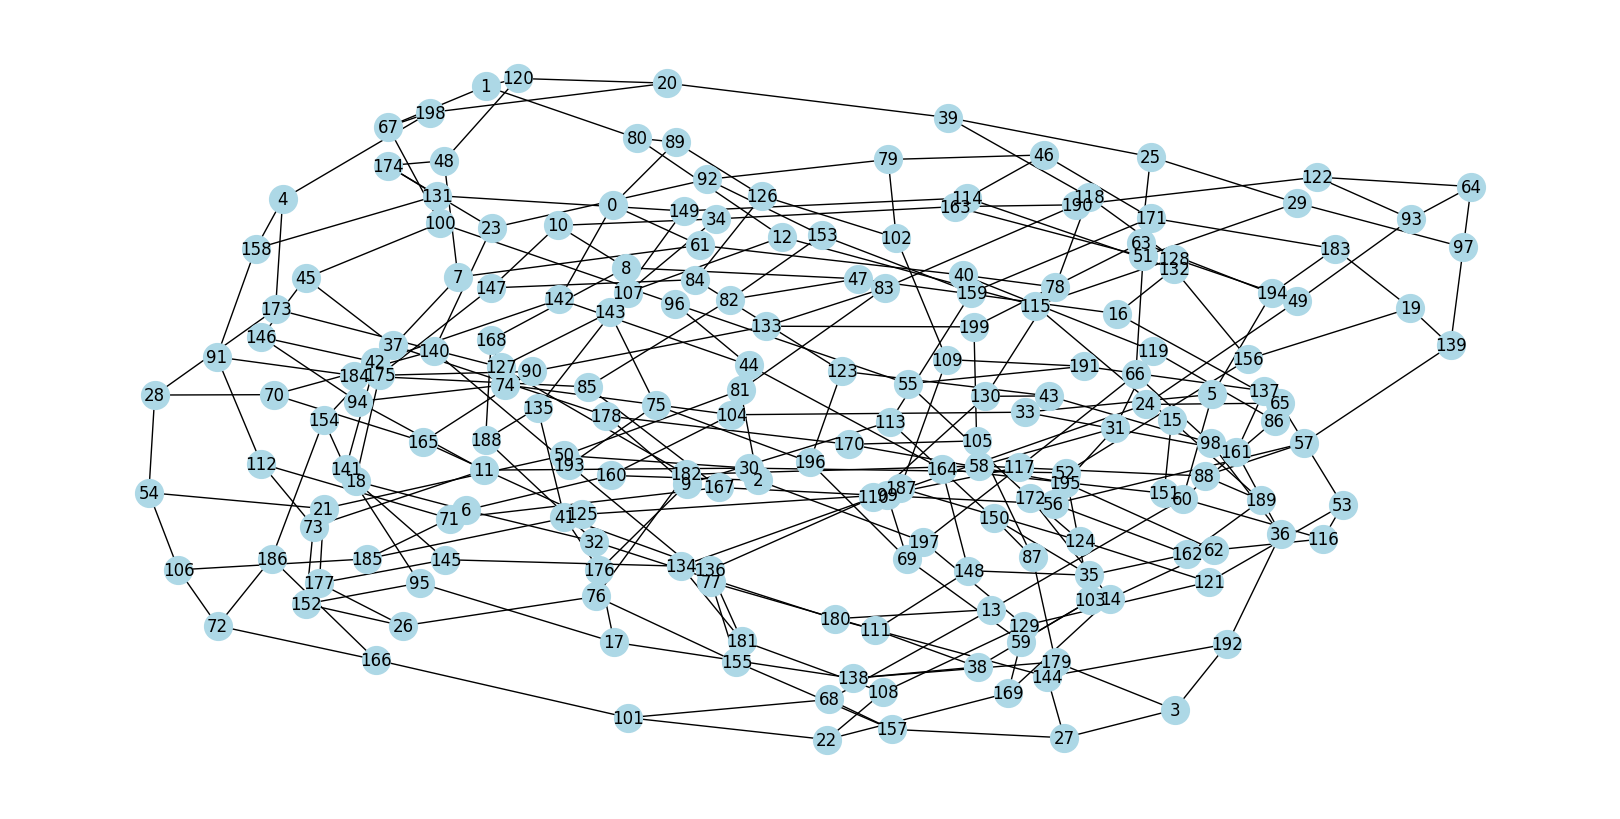

In [ ]:

# Create a random graph with 200 nodes and each node having 5 neighbors
num_nodes = 200
num_neighbors = 3

# Generate random graph
G = nx.random_regular_graph(num_neighbors, num_nodes, seed=42)

# Increase the figure size
plt.figure(figsize=(16, 8))  # Adjust the width and height as needed

# Draw the graph using NetworkX
pos = nx.spring_layout(G, seed=42)  # You can choose a layout algorithm
nx.draw(G, pos, with_labels=True, node_size=400, node_color='lightblue')

# Show the plot
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors

result_recommendation_new_records = pd.DataFrame(columns=[col for col in df_test_loyal_Feature_Service.iloc[:,15:].columns])
K_most_similar_records = 10
n_neighbors = 10
knn_model = NearestNeighbors(n_neighbors=n_neighbors)
knn_model.fit(df_train_loyal_Feature_Service.iloc[:,1:13])

for index_record in range(len(df_test_loyal_Feature_Service.iloc[:,1:13])):

    distances, indices = knn_model.kneighbors([df_test_loyal_Feature_Service.iloc[index_record,1:13]])
    #most_similar_indices = indices[0][1:K_most_similar_records+1]
    most_similar_ids = df_train_loyal_Feature_Service.iloc[indices[0]]['Customer ID']

    similar_records = df_train_loyal_Feature_Service[df_train_loyal_Feature_Service['Customer ID'].isin(most_similar_ids)]
    recommended_services = df_train_loyal_Feature_Service[df_train_loyal_Feature_Service['Customer ID'].isin(most_similar_ids)].iloc[:, 15:]

    new_record_values = []
    for column in recommended_services.columns:
        if sum(normalized_numbers*recommended_services[column]) >= 0.6:
            new_record_values.append(1)
        else:
            new_record_values.append(0)

    result_recommendation_new_records.loc[index_record] = new_record_values

accuracy_list = []
for record_number in range(len(result_recommendation_new_records)):
    count_same = 0
    for column_number in range(len(result_recommendation_new_records.columns)):
        if df_test_loyal_Feature_Service.iloc[record_number,15+column_number] == result_recommendation_new_records.iloc[record_number,column_number] :
            count_same += 1
    accuracy_list.append(count_same / len(result_recommendation_new_records.columns))
KNN_recommender_system_accuracy = np.mean(accuracy_list)
print("KNN Recommender System Accuracy:", KNN_recommender_system_accuracy)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but NearestNe

KNN Recommender System Accuracy: 0.6611844202205648


In [ ]:
result_recommendation_new_records = pd.DataFrame(columns=[col for col in df_test_loyal_Feature_Service.iloc[:,15:].columns])
K_most_similar_records = 10

for index_record in range(len(df_test_loyal_Feature_Service.iloc[:,1:13])):

    similarities = cosine_similarity([df_test_loyal_Feature_Service.iloc[index_record,1:13]], df_train_loyal_Feature_Service.iloc[:,1:13])
    similar_records_indices = np.argsort(similarities[0])[::-1][:K_most_similar_records]

    most_similar_ids = df_train_loyal_Feature_Service.iloc[similar_records_indices]['Customer ID']

    similar_records = df_train_loyal_Feature_Service[df_train_loyal_Feature_Service['Customer ID'].isin(most_similar_ids)]
    recommended_services = df_train_loyal_Feature_Service[df_train_loyal_Feature_Service['Customer ID'].isin(most_similar_ids)].iloc[:, 15:]

    new_record_values = []
    for column in recommended_services.columns:
        if sum(normalized_numbers*recommended_services[column]) >= 0.6:
            new_record_values.append(1)
        else:
            new_record_values.append(0)

    result_recommendation_new_records.loc[index_record] = new_record_values

accuracy_list = []
for record_number in range(len(result_recommendation_new_records)):
    count_same = 0
    for column_number in range(len(result_recommendation_new_records.columns)):
        if df_test_loyal_Feature_Service.iloc[record_number,15+column_number] == result_recommendation_new_records.iloc[record_number,column_number] :
            count_same += 1
    accuracy_list.append(count_same / len(result_recommendation_new_records.columns))
CosineSimilarity_recommender_system_accuracy = np.mean(accuracy_list)
print("Cosine Similarity Recommender System Accuracy:", CosineSimilarity_recommender_system_accuracy)

Cosine Similarity Recommender System Accuracy: 0.6614394084273602


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

result_recommendation_new_records = pd.DataFrame(columns=[col for col in df_test_loyal_Feature_Service.iloc[:,15:].columns])
K_most_similar_records = 10

for index_record in range(len(df_test_loyal_Feature_Service.iloc[:,1:13])):

    distances = euclidean_distances([df_test_loyal_Feature_Service.iloc[index_record,1:13]], df_train_loyal_Feature_Service.iloc[:,1:13])
    similar_records_indices = np.argsort(distances[0])[:K_most_similar_records]

    most_similar_ids = df_train_loyal_Feature_Service.iloc[similar_records_indices]['Customer ID']

    similar_records = df_train_loyal_Feature_Service[df_train_loyal_Feature_Service['Customer ID'].isin(most_similar_ids)]
    recommended_services = df_train_loyal_Feature_Service[df_train_loyal_Feature_Service['Customer ID'].isin(most_similar_ids)].iloc[:, 15:]

    new_record_values = []
    for column in recommended_services.columns:
        if sum(normalized_numbers*recommended_services[column]) >= 0.6:
            new_record_values.append(1)
        else:
            new_record_values.append(0)

    result_recommendation_new_records.loc[index_record] = new_record_values

accuracy_list = []
for record_number in range(len(result_recommendation_new_records)):
    count_same = 0
    for column_number in range(len(result_recommendation_new_records.columns)):
        if df_test_loyal_Feature_Service.iloc[record_number,15+column_number] == result_recommendation_new_records.iloc[record_number,column_number] :
            count_same += 1
    accuracy_list.append(count_same / len(result_recommendation_new_records.columns))
EuclideanDistance_recommender_system_accuracy = np.mean(accuracy_list)
print("Euclidean Distance Recommender System Accuracy:", EuclideanDistance_recommender_system_accuracy)

Euclidean Distance Recommender System Accuracy: 0.6611844202205648


In [ ]:
from sklearn.metrics.pairwise import manhattan_distances

result_recommendation_new_records = pd.DataFrame(columns=[col for col in df_test_loyal_Feature_Service.iloc[:,15:].columns])
K_most_similar_records = 10

for index_record in range(len(df_test_loyal_Feature_Service.iloc[:,1:13])):

    distances = manhattan_distances([df_test_loyal_Feature_Service.iloc[index_record,1:13]], df_train_loyal_Feature_Service.iloc[:,1:13])
    similar_records_indices = np.argsort(distances[0])[:K_most_similar_records]

    most_similar_ids = df_train_loyal_Feature_Service.iloc[similar_records_indices]['Customer ID']

    similar_records = df_train_loyal_Feature_Service[df_train_loyal_Feature_Service['Customer ID'].isin(most_similar_ids)]
    recommended_services = df_train_loyal_Feature_Service[df_train_loyal_Feature_Service['Customer ID'].isin(most_similar_ids)].iloc[:, 15:]

    new_record_values = []
    for column in recommended_services.columns:
        if sum(normalized_numbers*recommended_services[column]) >= 0.6:
            new_record_values.append(1)
        else:
            new_record_values.append(0)

    result_recommendation_new_records.loc[index_record] = new_record_values

accuracy_list = []
for record_number in range(len(result_recommendation_new_records)):
    count_same = 0
    for column_number in range(len(result_recommendation_new_records.columns)):
        if df_test_loyal_Feature_Service.iloc[record_number,15+column_number] == result_recommendation_new_records.iloc[record_number,column_number] :
            count_same += 1
    accuracy_list.append(count_same / len(result_recommendation_new_records.columns))
ManhattanDistance_recommender_system_accuracy = np.mean(accuracy_list)
print("Manhattan Distance Recommender System Accuracy:", ManhattanDistance_recommender_system_accuracy)

Manhattan Distance Recommender System Accuracy: 0.6632243258749283


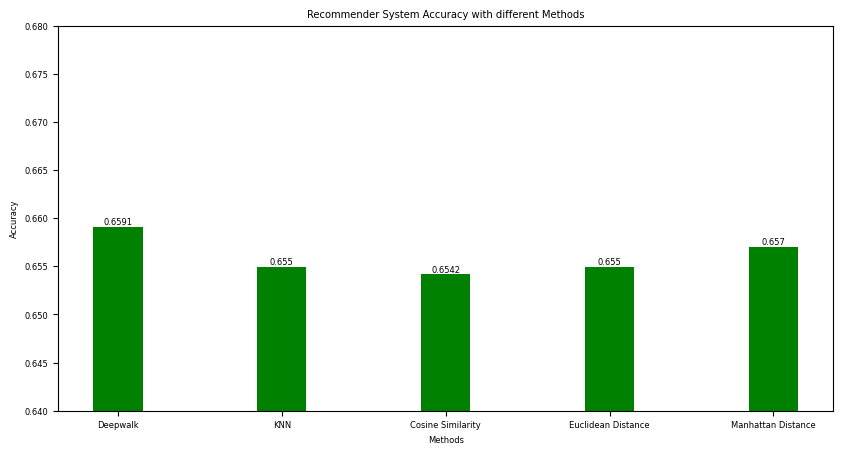

In [ ]:
recommender_systems_accuracy = [Deepwalk_recommender_system_accuracy,KNN_recommender_system_accuracy,CosineSimilarity_recommender_system_accuracy,EuclideanDistance_recommender_system_accuracy,ManhattanDistance_recommender_system_accuracy]
recommender_systems_names = ['Deepwalk','KNN','Cosine Similarity','Euclidean Distance','Manhattan Distance']
fig = plt.figure(figsize = (10, 5))
column_width = 0.3  
bars = plt.bar(recommender_systems_names, recommender_systems_accuracy, color='green', width=column_width)
plt.title('Recommender System Accuracy with different Methods')
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.ylim((0.64,0.68))
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 4), ha='center', va='bottom', color='black')
plt.show()

In [ ]:
df_test_churn_Feature_Service = df_test_churn_customers.merge(df_customers_services, on='index', how='left')

In [ ]:
df_test_churn_Feature_Service = df_test_churn_Feature_Service.drop(columns=['Count','Quarter','Referred a Friend',
                                                                              'Number of Referrals_y','Tenure in Months_y','Offer',
                                                                              'Avg Monthly Long Distance Charges','Avg Monthly GB Download',
                                                                              'Monthly Charge_y','Total Charges_y','Total Refunds',
                                                                              'Total Extra Data Charges','Total Long Distance Charges_y',
                                                                              'Total Revenue_y'])

List_Services = ['Phone Service','Multiple Lines','Internet Service','Internet Type','Online Security','Online Backup','Device Protection Plan',
                                                           	'Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data','Contract','Paperless Billing','Payment Method']
for categorical_column in List_Services :
    one_hot = pd.get_dummies(df_test_churn_Feature_Service[categorical_column],prefix=categorical_column)
    df_test_churn_Feature_Service = df_test_churn_Feature_Service.drop(categorical_column,axis = 1)
    df_test_churn_Feature_Service = pd.concat([df_test_churn_Feature_Service,one_hot],axis=1)

df_test_churn_Feature_Service = df_test_churn_Feature_Service.drop(columns=['Phone Service_No','Multiple Lines_No','Internet Service_No',
                                                                              'Internet Type_None','Online Security_No','Online Backup_No',
                                                                              'Device Protection Plan_No','Premium Tech Support_No','Streaming TV_No',
                                                                              'Streaming Movies_No','Streaming Music_No','Unlimited Data_No',
                                                                              'Paperless Billing_No'])

new_column_names = ['index', 'Contract_Month-to-Month', 'Tenure in Months_x',
       'Contract_Two Year', 'Number of Referrals_x', 'Internet Service_Yes',
       'Payment Method_Credit Card', 'Total Revenue_x',
       'Total Long Distance Charges_x', 'Contract_One Year',
       'Monthly Charge_x', 'Total Charges_x', 'Payment Method_Bank Withdrawal',
       'Old Churn Score', 'Customer ID', 'Phone Service',
       'Multiple Lines Service', 'Internet Service', 'Internet Type_Cable Service',
       'Internet Type_DSL Service', 'Internet Type_Fiber Optic Service', 'Online Security Service',
       'Online Backup Service', 'Device Protection Plan Service',
       'Premium Tech Support Service', 'Streaming TV Service', 'Streaming Movies Service',
       'Streaming Music Service', 'Unlimited Data Service', 'Contract_Month-to-Month Service',
       'Contract_One Year Service', 'Contract_Two Year Service', 'Paperless Billing Service',
       'Payment Method_Bank Withdrawal Service', 'Payment Method_Credit Card Service',
       'Payment Method_Mailed Check Service']

df_test_churn_Feature_Service.columns = new_column_names 
df_test_churn_Feature_Service

KeyError: "['Phone Service_No', 'Multiple Lines_No', 'Internet Service_No', 'Internet Type_None', 'Online Security_No', 'Online Backup_No', 'Device Protection Plan_No', 'Premium Tech Support_No', 'Streaming TV_No', 'Streaming Movies_No', 'Streaming Music_No', 'Unlimited Data_No', 'Paperless Billing_No'] not found in axis"

In [ ]:
result_recommendation_new_records = pd.DataFrame(columns=[col for col in df_test_churn_Feature_Service.iloc[:,15:].columns])
K_most_similar_records = 10
num_numbers = K_most_similar_records

# Generate a list of random numbers
random_numbers = [random.random() for _ in range(num_numbers)]

# Normalize the list of random numbers
total = sum(random_numbers)
normalized_numbers = [num / total for num in random_numbers]

# Sort the normalized numbers in descending order
normalized_numbers.sort(reverse=True)

# Load your existing records and new record DataFrames
existing_records_df = df_test_loyal_Feature_Service.iloc[:,1:13]
new_record_df = df_test_churn_Feature_Service.iloc[:,1:13]

# Combine the existing records and new record for creating a single graph
combined_records_df = pd.concat([existing_records_df, new_record_df], ignore_index=True)

# Create a graph using DeepWalk
graph = {}  # A dictionary to store the graph

# Populate the graph using your combined records DataFrame
for i, record in combined_records_df.iterrows():
    record_id = str(i)  # Convert index to string
    neighbors = [str(n) for n in np.random.choice(len(combined_records_df), size=random.randint(1, 5), replace=False)]
    graph[record_id] = neighbors

# Generate random walks on the graph
sentences = []  # List of random walks
num_walks = 15
walk_length = 15

for _ in range(num_walks):
    for node in graph:
        walk = [node]
        while len(walk) < walk_length:
            neighbors = graph[node]
            if not neighbors:
                break
            next_node = random.choice(neighbors)
            walk.append(next_node)
            node = next_node
        sentences.append(walk)

# Train Word2Vec model
embedding_dim = 32
model = Word2Vec(sentences, vector_size=embedding_dim, window=5, sg=1, epochs=10)

for index_record in range(len(existing_records_df),len(combined_records_df)):
    # Calculate embedding for the new record
    new_record_embedding = model.wv[str(index_record)]  # Use the appropriate index

    # Calculate embeddings for the existing records
    existing_record_embeddings = [model.wv[str(node)] for node in range(len(existing_records_df))]

    # Calculate cosine similarities between the new record embedding and existing record embeddings
    similarities = cosine_similarity(new_record_embedding.reshape(1, -1), np.array(existing_record_embeddings))
    
    similar_records_indices = similarities.argsort()[0][-(K_most_similar_records+1):-1]

    # Extract the IDs of the most similar records
    most_similar_ids = df_test_loyal_Feature_Service.iloc[similar_records_indices]['Customer ID']

    # Recommend services based on the most similar records
    similar_records = df_test_loyal_Feature_Service[df_test_loyal_Feature_Service['Customer ID'].isin(most_similar_ids)]
    recommended_services = df_test_loyal_Feature_Service[df_test_loyal_Feature_Service['Customer ID'].isin(most_similar_ids)].iloc[:, 15:]

    new_record_values = []
    for column in recommended_services.columns:
        if sum(normalized_numbers*recommended_services[column]) >= 0.6:
            new_record_values.append(1)
        else:
            new_record_values.append(0)

    result_recommendation_new_records.loc[index_record] = new_record_values

result_recommendation_new_records = result_recommendation_new_records.reset_index(drop=True)
final_result = pd.concat([df_test_churn_Feature_Service['Customer ID'], result_recommendation_new_records], axis=1)
final_result

Customer ID  Phone Service  Multiple Lines Service  Internet Service  \
0    5178-LMXOP              1                       0                 1   
1    2144-BFDSO              1                       0                 1   
2    5481-NTDOH              1                       1                 1   
3    2516-VQRRV              1                       0                 1   
4    6038-GCYEC              1                       0                 1   
..          ...            ...                     ...               ...   
643  7722-CVFXN              1                       0                 1   
644  2055-PDADH              1                       0                 1   
645  9061-TIHDA              1                       0                 1   
646  7730-IUTDZ              1                       0                 0   
647  1069-XAIEM              1                       0                 1   

     Internet Type_Cable Service  Internet Type_DSL Service  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   
..                           ...                        ...   
643                            0                          0   
644                            0                          0   
645                            0                          0   
646                            0                          0   
647                            0                          0   

     Internet Type_Fiber Optic Service  Online Security Service  \
0                                    0                        0   
1                                    0                        0   
2                                    0                        0   
3                                    1                        0   
4                                    0                        0   
..                                 ...                      ...   
643                                  0                        0   
644                                  0                        0   
645                                  0                        0   
646                                  0                        0   
647                                  1                        0   

     Online Backup Service  Device Protection Plan Service  \
0                        0                               0   
1                        1                               1   
2                        0                               1   
3                        0                               0   
4                        0                               0   
..                     ...                             ...   
643                      0                               0   
644                      0                               0   
645                      0                               0   
646                      0                               0   
647                      0                               0   

     Premium Tech Support Service  Streaming TV Service  \
0                               0                     0   
1                               0                     0   
2                               0                     1   
3                               0                     0   
4                               0                     1   
..                            ...                   ...   
643                             0                     0   
644                             0                     0   
645                             0                     0   
646                             0                     0   
647                             0                     0   

     Streaming Movies Service  Streaming Music Service  \
0                